# Rlab05

In [3]:
library(tidyverse)
library(ggplot2)
library (magrittr)
library(lubridate)
library(scales) # use transparent parameter in plots and use scale_x_continuous
library(coda)
library(rjags)
set.seed(09112001) # set seed for reproducibility


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Linked to JAGS 4.3.1

Loaded modules: basemod,bugs



# Exercise 1

- Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
- Considering the following to sets of observations taken over a fixed large time interval in two different corps:
<p align="center">
  <img src='./table.PNG' />
</p>

In [4]:
obs1 = rbind(c(0, 1, 2, 3, 4), c(109, 65, 22, 3, 1))
obs2 = rbind(c(0, 1, 2, 3, 4), c(144, 91, 32, 11, 2))

# sum the two observations and flatten the result 
# obs= rbind(c(0, 1, 2, 3, 4), obs1[2,] + obs2[2,])
obs_flatten1 = c()
obs_flatten2 = c()
j = 1
for (i in obs1[1,]) {
    obs_flatten1 = c(obs_flatten1, rep(i, obs1[2,j]))
    obs_flatten2 = c(obs_flatten2, rep(i, obs2[2,j]))
    j = j + 1
}

n_samples = 2000
mu = seq(from = 1 / (2 * n_samples), to = max(obs_flatten1) + 1, length.out = n_samples)
delta_mu = mu[2] - mu[1]

## Request (a)
Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate overthe measurement time.  Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [5]:
############### FIRST MEASUREMENT ############### 
n1 = length(obs_flatten1)
post_unif1 = dgamma(x = mu, shape = 1 + sum(obs_flatten1), rate = n1)
mean_unif1 = sum(post_unif1 * mu) * delta_mu
median_unif1 = qgamma(p = 0.5, shape = 1 + sum(obs_flatten1), rate = n1)
variance_unif1 = sum(post_unif1 * (mu - mean_unif1) ** 2) * delta_mu

lower_unif1 = qgamma(p = 0.025, shape = 1 + sum(obs_flatten1), rate = n1)
upper_unif1 = qgamma(p = 0.975, shape = 1 + sum(obs_flatten1), rate = n1)

cat('-------- GAMMA(', 1 + sum(obs_flatten1), ',', n_samples, ') POSTERIOR FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif1, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif1, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif1, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif1, digits = 3), ', ', format(upper_unif1, digits = 3), ')', sep = '', '\n')

-------- GAMMA(123,2000) POSTERIOR FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------
mean: 0.615
median: 0.6133
variance: 0.00307
posterior 95% c.i.: (0.511, 0.728)


In [6]:
############### SECOND MEASUREMENT ############### 
n2 = length(obs_flatten2)
post_unif2 = dgamma(x = mu, shape = 1 + sum(obs_flatten2), rate = n2)
mean_unif2 = sum(post_unif2 * mu) * delta_mu
median_unif2 = qgamma(p = 0.5, shape = 1 + sum(obs_flatten2), rate = n2)
variance_unif2 = sum(post_unif2 * (mu - mean_unif2) ** 2) * delta_mu

lower_unif2 = qgamma(p = 0.025, shape = 1 + sum(obs_flatten2), rate = n2)
upper_unif2 = qgamma(p = 0.975, shape = 1 + sum(obs_flatten2), rate = n2)

cat('-------- GAMMA(', 1 + sum(obs_flatten2), ',', n_samples, ') POSTERIOR FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif2, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif2, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif2, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif2, digits = 3), ', ', format(upper_unif2, digits = 3), ')', sep = '', '\n')

-------- GAMMA(197,2000) POSTERIOR FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------
mean: 0.7036
median: 0.7024
variance: 0.00251
posterior 95% c.i.: (0.609, 0.805)


## Request (b)
Assuming now a Jeffreys’ prior,

$$
    g(\lambda) \propto 1 / \sqrt(\lambda), \quad \text{with} \,\, \lambda > 0
$$

compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [7]:
############### FIRST MEASUREMENT ############### 
post_jeff1 = dgamma(x = mu, shape = 0.5 + sum(obs_flatten1), rate = n1)
mean_jeff1 = sum(post_jeff1 * mu) * delta_mu
median_jeff1 = qgamma(p = 0.5, shape = 0.5 + sum(obs_flatten1), rate = n1)
variance_jeff1 = sum(post_jeff1 * (mu - mean_jeff1) ** 2) * delta_mu

lower_jeff1 = qgamma(p = 0.025, shape = 0.5 + sum(obs_flatten1), rate = n1)
upper_jeff1 = qgamma(p = 0.975, shape = 0.5 + sum(obs_flatten1), rate = n1)

cat('-------- GAMMA(', 0.5 + sum(obs_flatten1), ',', n_samples, ') POSTERIOR FROM JEFFREY\'S PRIOR (FIRST MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_jeff1, digits = 4), sep = '', '\n')
cat('median: ', format(median_jeff1, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_jeff1, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_jeff1, digits = 3), ', ', format(upper_jeff1, digits = 3), ')', sep = '', '\n')

-------- GAMMA(122.5,2000) POSTERIOR FROM JEFFREY'S PRIOR (FIRST MEASUREMENT) --------
mean: 0.6125
median: 0.6108
variance: 0.00306
posterior 95% c.i.: (0.509, 0.726)


In [8]:
############### SECOND MEASUREMENT ############### 
post_jeff2 = dgamma(x = mu, shape = 0.5 + sum(obs_flatten2), rate = n2)
mean_jeff2 = sum(post_jeff2 * mu) * delta_mu
median_jeff2 = qgamma(p = 0.5, shape = 0.5 + sum(obs_flatten2), rate = n2)
variance_jeff2 = sum(post_jeff2 * (mu - mean_jeff2) ** 2) * delta_mu

lower_jeff2 = qgamma(p = 0.025, shape = 0.5 + sum(obs_flatten2), rate = n2)
upper_jeff2 = qgamma(p = 0.975, shape = 0.5 + sum(obs_flatten2), rate = n2)

cat('-------- GAMMA(', 0.5 + sum(obs_flatten2), ',', n_samples, ') POSTERIOR FROM JEFFREY\'S PRIOR (SECOND MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_jeff2, digits = 4), sep = '', '\n')
cat('median: ', format(median_jeff2, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_jeff2, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_jeff2, digits = 3), ', ', format(upper_jeff2, digits = 3), ')', sep = '', '\n')

-------- GAMMA(196.5,2000) POSTERIOR FROM JEFFREY'S PRIOR (SECOND MEASUREMENT) --------
mean: 0.7018
median: 0.7006
variance: 0.00251
posterior 95% c.i.: (0.607, 0.803)


Create the required plots for the two previous posteriors

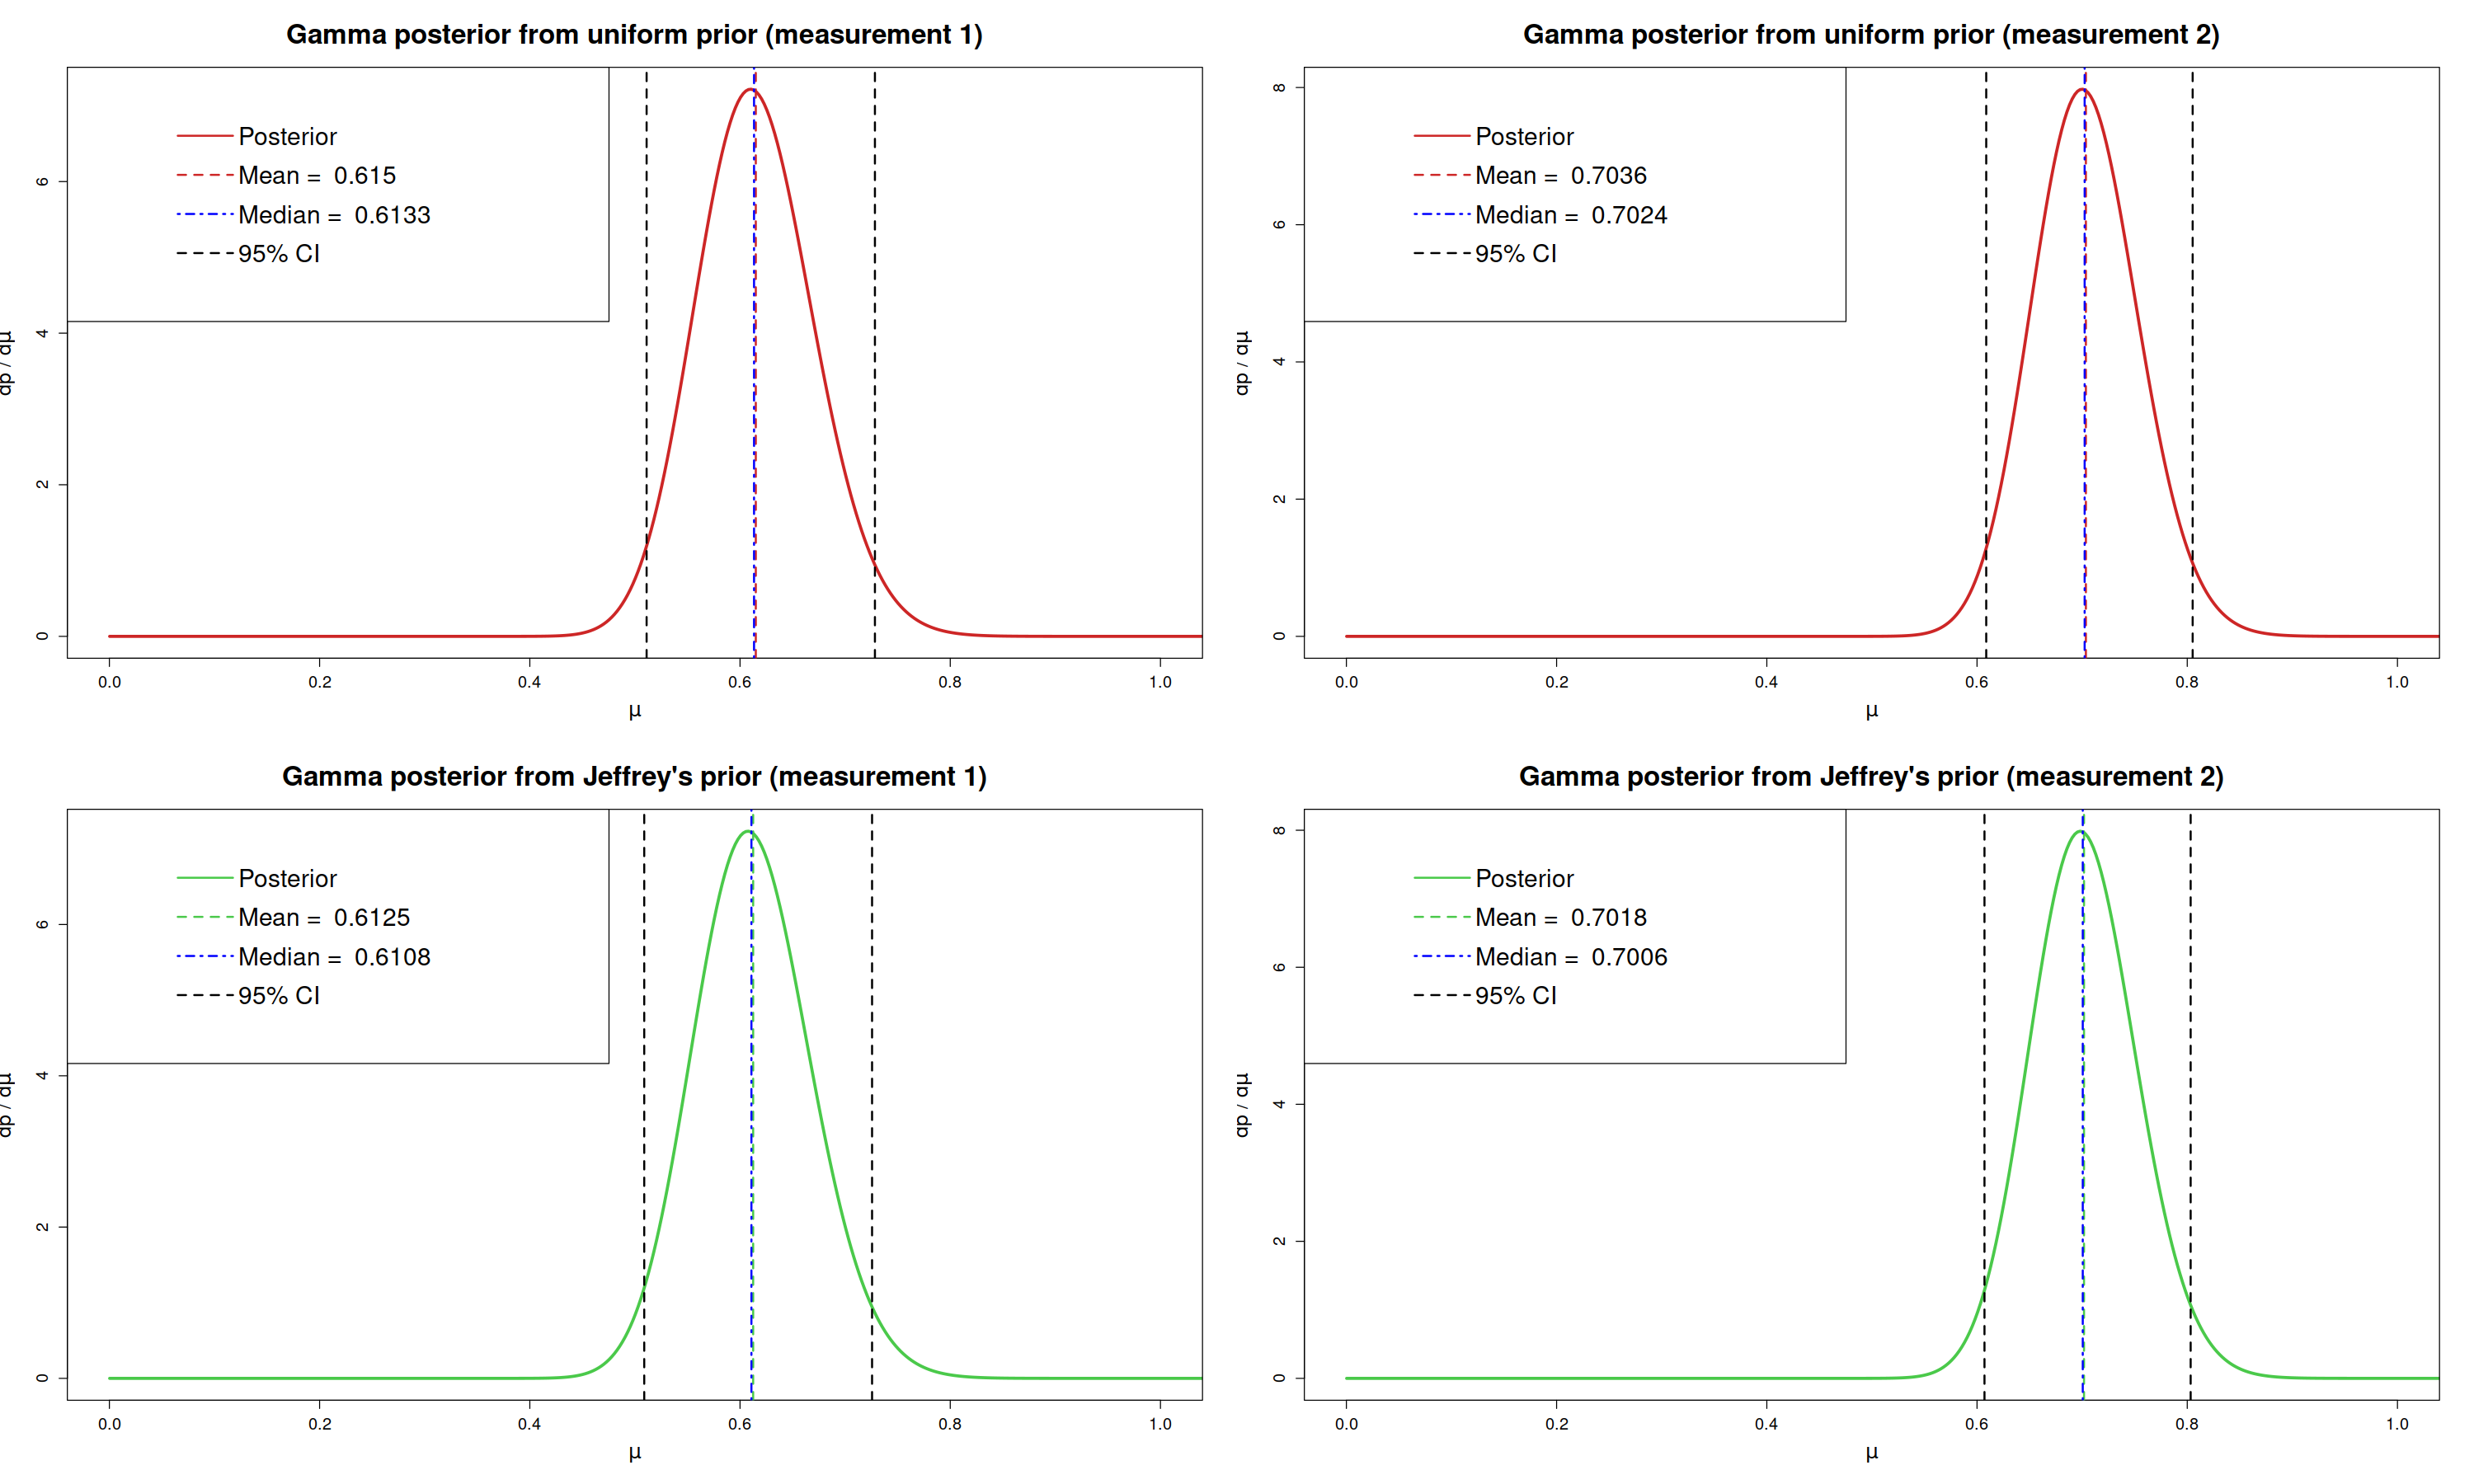

In [9]:
options(repr.plot.width = 25, repr.plot.height = 15)
par(mfrow = c(2, 2))

plot(mu, post_unif1, type = 'l', lwd = 3, col = 'firebrick3', xlim = c(0, 1), cex.axis = 1.2, cex.main = 2,
        xlab = expression(mu), ylab = expression(paste('dp / d', mu, sep = '')), cex.lab = 1.5,
        main = 'Gamma posterior from uniform prior (measurement 1)')
abline(v = mean_unif1, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif1, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif1, upper_unif1), col = 'black', lty = 2, lwd = 2)
legend('topleft', legend = c('Posterior', paste('Mean = ', format(mean_unif1, digits = 4)), paste('Median = ', format(median_unif1, digits = 4)), '95% CI'), 
        col = c('firebrick3', 'firebrick3', 'blue', 'black'), 
        lty = c(1, 2, 4, 2), lwd = 2, cex = 1.8, seg.len = 0.5, text.width = 0.3, x.intersp = 0.05, y.intersp = 0.4)

plot(mu, post_unif2, type = 'l', lwd = 3, col = 'firebrick3', xlim = c(0, 1), cex.axis = 1.2, cex.main = 2, 
        xlab = expression(mu), ylab = expression(paste('dp / d', mu, sep = '')), cex.lab = 1.5,
        main = 'Gamma posterior from uniform prior (measurement 2)')
abline(v = mean_unif2, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif2, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif2, upper_unif2), col = 'black', lty = 2, lwd = 2)
legend('topleft', legend = c('Posterior', paste('Mean = ', format(mean_unif2, digits = 4)), paste('Median = ', format(median_unif2, digits = 4)), '95% CI'), 
        col = c('firebrick3', 'firebrick3', 'blue', 'black'), 
        lty = c(1, 2, 4, 2), lwd = 2, cex = 1.8, seg.len = 0.5, text.width = 0.3, x.intersp = 0.05, y.intersp = 0.4)

plot(mu, post_jeff1, type = 'l', lwd = 3, col = '#4ac94a', xlim = c(0, 1), cex.axis = 1.2, cex.main = 2, 
        xlab = expression(mu), ylab = expression(paste('dp / d', mu, sep = '')), cex.lab = 1.5,
        main = 'Gamma posterior from Jeffrey\'s prior (measurement 1)')
abline(v = mean_jeff1, col = '#4ac94a', lty = 2, lwd = 2)
abline(v = median_jeff1, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_jeff1, upper_jeff1), col = 'black', lty = 2, lwd = 2)
legend('topleft', legend = c('Posterior', paste('Mean = ', format(mean_jeff1, digits = 4)), paste('Median = ', format(median_jeff1, digits = 4)), '95% CI'), 
        col = c('#4ac94a', '#4ac94a', 'blue', 'black'), 
        lty = c(1, 2, 4, 2), lwd = 2, cex = 1.8, seg.len = 0.5, text.width = 0.3, x.intersp = 0.05, y.intersp = 0.4)

plot(mu, post_jeff2, type = 'l', lwd = 3, col = '#4ac94a', xlim = c(0, 1), cex.axis = 1.2, cex.main = 2,
        xlab = expression(mu), ylab = expression(paste('dp / d', mu, sep = '')), cex.lab = 1.5,
        main = 'Gamma posterior from Jeffrey\'s prior (measurement 2)')
abline(v = mean_jeff2, col = '#4ac94a', lty = 2, lwd = 2)
abline(v = median_jeff2, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_jeff2, upper_jeff2), col = 'black', lty = 2, lwd = 2)
legend('topleft', legend = c('Posterior', paste('Mean = ', format(mean_jeff2, digits = 4)), paste('Median = ', format(median_jeff2, digits = 4)), '95% CI'), 
        col = c('#4ac94a', '#4ac94a', 'blue', 'black'), 
        lty = c(1, 2, 4, 2), lwd = 2, cex = 1.8, seg.len = 0.5, text.width = 0.3, x.intersp = 0.05, y.intersp = 0.4)

# Exercise 2

Solve Exercise 1 with a Markov Chain Monte Carlo. Build your own MCMC, using the functionsintroduced during lectures, or using a MCM library like JAGS.


## MCMC sampling of the posterior starting from an uniform prior
In this exercise I follow the code sketched by the Professor during the lectures.

In the following cell there is the main function that performs the MCMC, by taking as inputs the function to sample, the initial guess for the parameter to be sampled, the desired number of samples and the $\sigma$ parameter of the proposal function.

In [10]:
metropolis_1dim = function(func, theta_init, n_sample, sigma) {
    theta_cur = theta_init
    func_Cur = func(theta_cur)
    func_Samp = matrix(data=NA, nrow=n_sample , ncol=2+1)
    n_accept = 0
    rate_accept = 0.0
    for (n in 1:n_sample) {
        theta_prop = rnorm(n=1, mean = theta_cur, sigma)
        func_Prop = func(theta_prop)
        logMR = func_Prop - func_Cur # Log10 of the Metropolis ratio
        if ((logMR >= 0) | (logMR > log10(runif(1)))) {
            theta_cur = theta_prop
            func_Cur = func_Prop
            n_accept = n_accept + 1
        }
        func_Samp[n, 1] = func_Cur
        func_Samp[n, 2] = theta_cur
    }
    return(func_Samp)
}

Here we set the initial parameters and define a vector ```sample_sig``` that contains various $\sigma$ parameters for the Gaussian proposal distribution.

In [11]:
theta_init = 0.4
sample_sig = c(0.6, 1, 5, 10, 20, 30)
n_sample = 10 ** 5
chains1 = matrix(NA, nrow = n_sample, ncol = length(sample_sig))
chains2 = matrix(NA, nrow = n_sample, ncol = length(sample_sig))

Here we call the metropolis function in order to get the chain. Since we have two different sets of measurements the functions ```testfunc``` and ```testfunc_metropolis``` are defined each time the metropolis function is called. As it is possible to see, the ```testfunc``` functions return a Gamma distribution with parameters that follow from a uniform distribution.

In [12]:
testfunc = function(theta) {
    return(dgamma(x = theta, shape = 1 + sum(obs_flatten1), rate = n1))
}

testfunc_metropolis = function(theta) {
    return(log10(testfunc(theta)))
}

for (i in 1:length(sample_sig)) {
    chains1[,i] = metropolis_1dim(func=testfunc_metropolis, theta_init = theta_init, n_sample = n_sample, sigma = sample_sig[i] ** 2)[,2]
}

testfunc = function(theta) {
    return(dgamma(x = theta, shape = 1 + sum(obs_flatten2), rate = n2))
}

testfunc_metropolis = function(theta) {
    return(log10(testfunc(theta)))
}

for (i in 1:length(sample_sig)) {
    chains2[,i] = metropolis_1dim(func=testfunc_metropolis, theta_init = theta_init, n_sample = n_sample, sigma = sample_sig[i] ** 2)[,2]
}

Here we filter the chains removing the "outliers", i.e. the points beyond $3\sigma$ from the mean, due to the burn-in period.

In [13]:
for (i in 1:ncol(chains1)) {
    mean_chain1 = mean(chains1[,i])
    std_chain1 = sd(chains1[,i])
    filtered_chain1 = chains1[,i][which(chains1[,i] < mean_chain1 + 3 * std_chain1 & chains1[,i] > mean_chain1 - 3 * std_chain1)]
    chains1[,i] = c(filtered_chain1, rep(NA, length(chains1[,i]) - length(filtered_chain1)))

    mean_chain2 = mean(chains2[,i])
    std_chain2 = sd(chains2[,i])
    filtered_chain2 = chains2[,i][which(chains2[,i] < mean_chain2 + 3 * std_chain2 & chains2[,i] > mean_chain2 - 3 * std_chain2)]
    chains2[,i] = c(filtered_chain2, rep(NA, length(chains2[,i]) - length(filtered_chain2)))
}

Here we plot the chains obtained by running the MCMC with different values of $\sigma$ of the proposal distribution, as stated before. It is possible to see that for small values of $\sigma$ the red analytical line that represents the posterior fits very well the histogram, while as $\sigma$ increases the histogram shows overcrowded bins as well as bins with zero or almost zero counts. This is due to the fact that, in this case, a large $\sigma$ increases the chance of extracting a proposal parameter that is unlikely or very unlikely to be sampled from the posterior, which then will be rejected. If this happens many times it means that the chain gets "stuck" and very few new samples arise as the iterations go on.

---------------- FIRST MEASUREMENT SAMPLE HISTOGRAMS WITH VARIABLE PROPOSAL SIGMA ----------------


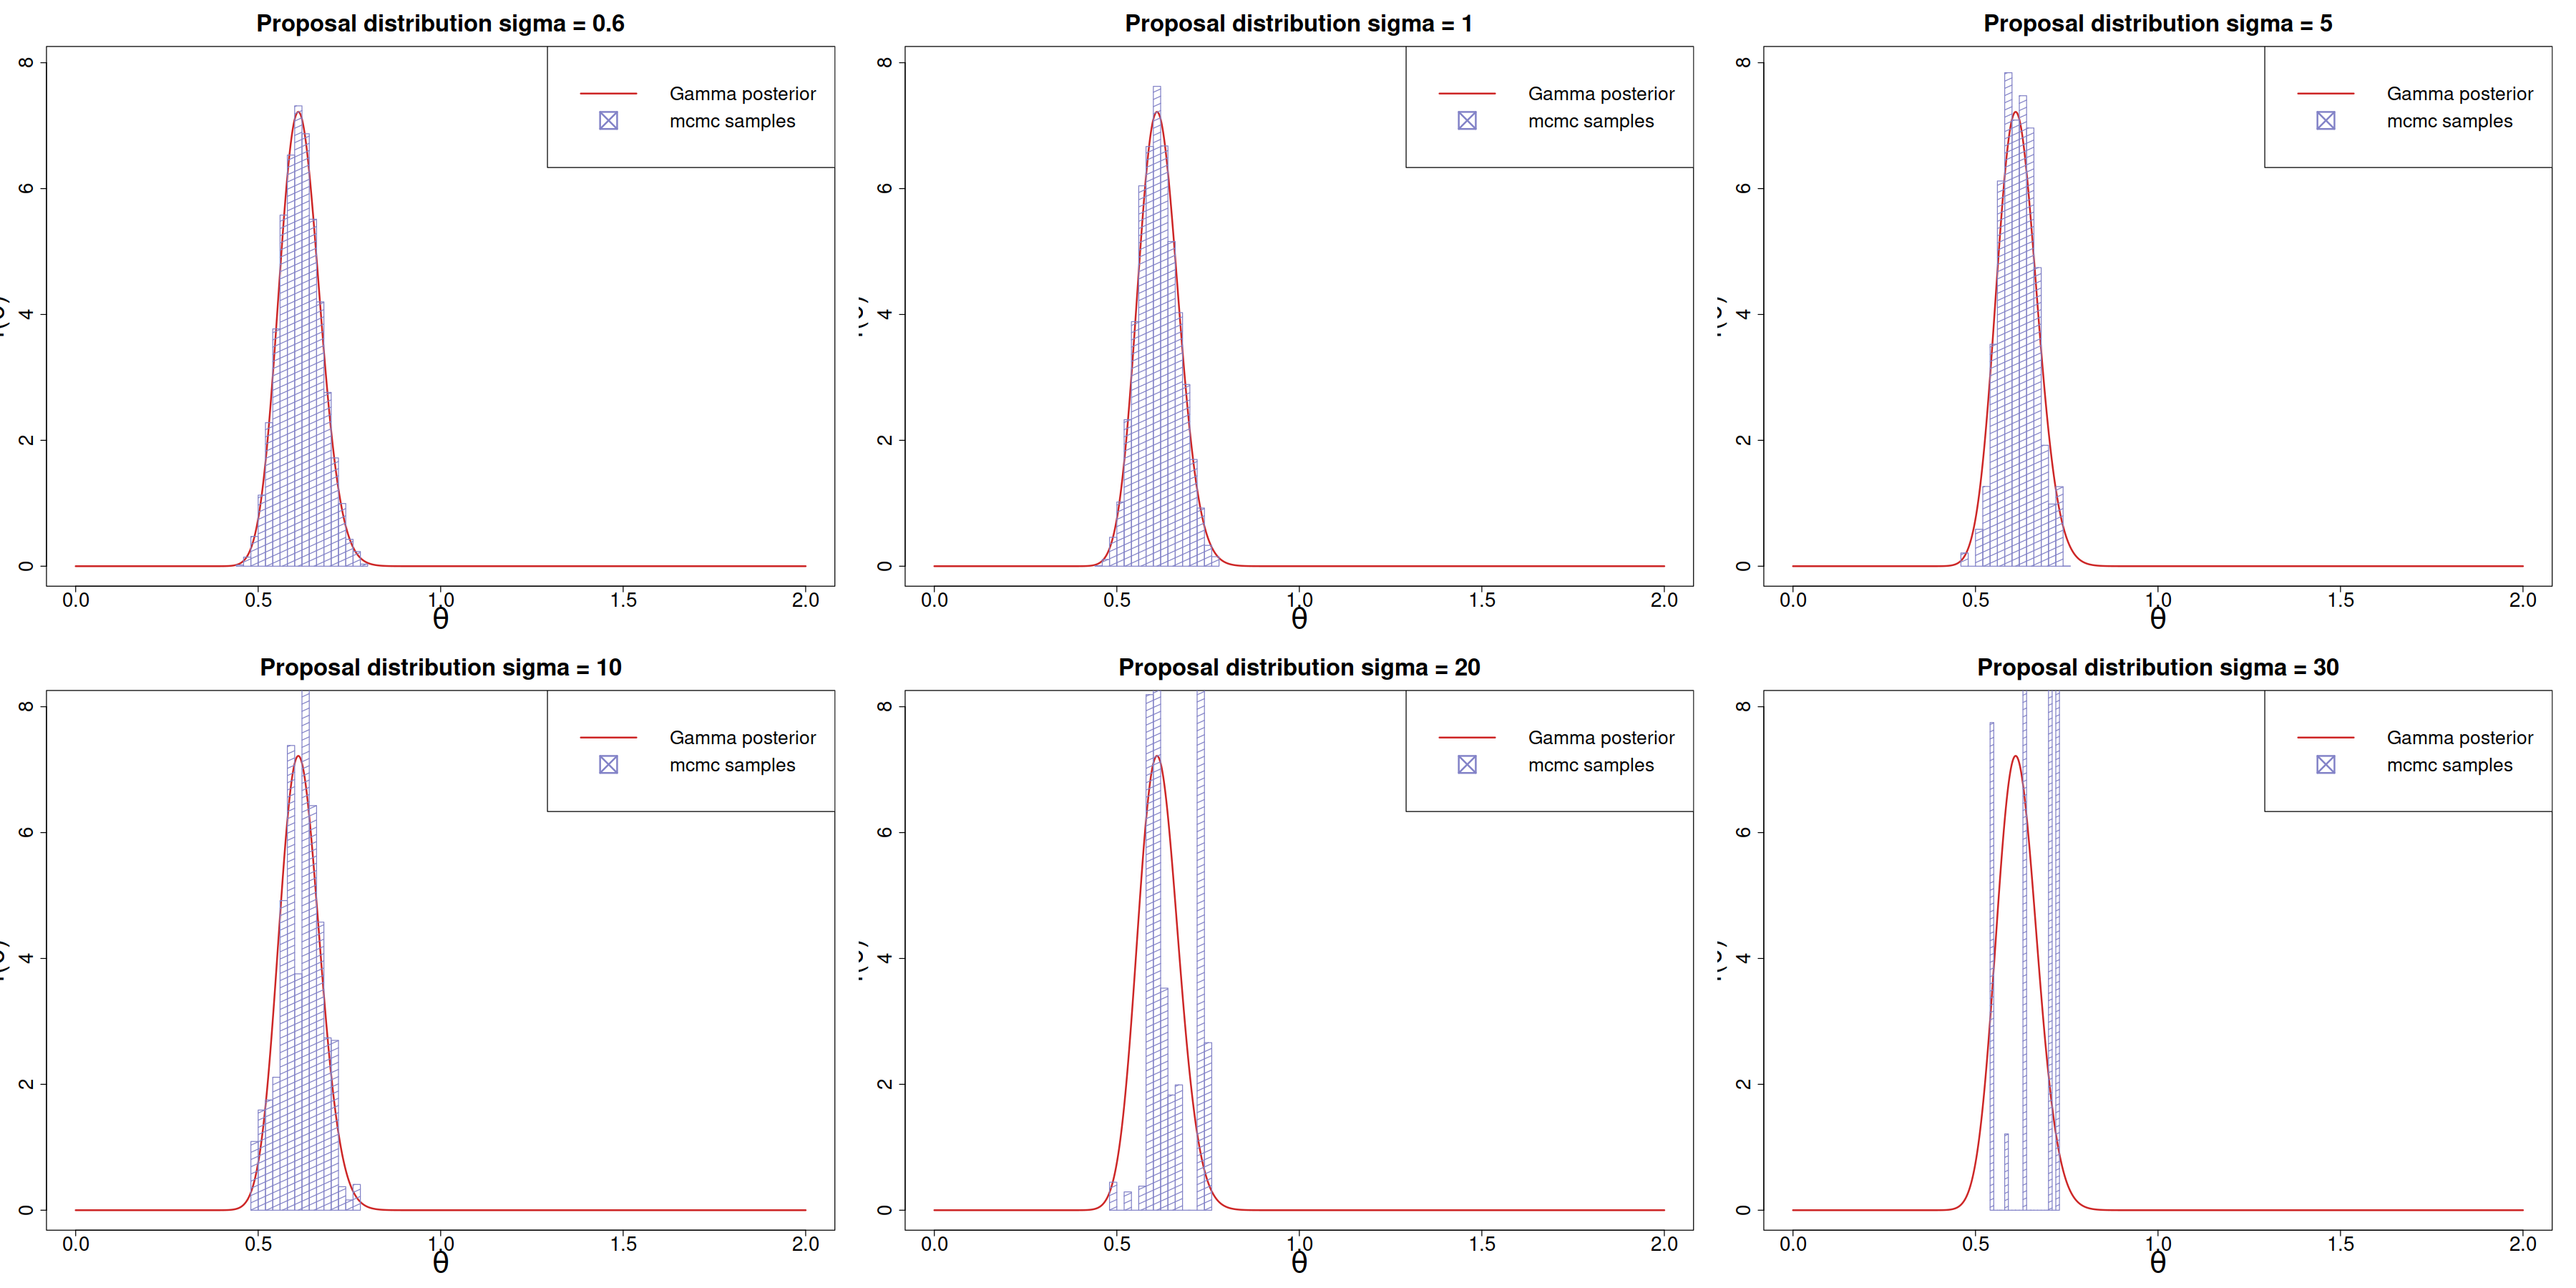

In [14]:
x = seq(0, 2, length.out=10**4)

testfunc = function(theta) {
    return(dgamma(x = theta, shape = 1 + sum(obs_flatten1), rate = n1))
}

y = testfunc(x)

par(mfrow=c(2,3))
options(repr.plot.width=30, repr.plot.height=15)

cols = c('#2eaf17', '#8282c7', '#d95416', '#cc54dc', '#e0e015')
for (i in 1:ncol(chains1)) {
    plot(x, y, type='l', lwd=2, ylim = c(0, 1.1 * max(y)), col='firebrick3', main = paste('Proposal distribution', expression(sigma), '=', sample_sig[i]),
        xlab=expression(theta), ylab=expression(paste('f(',theta ,')', sep='')), cex.axis = 2.1, cex.lab = 3, cex.main = 2.5)
    hist(chains1[,i], breaks = 'sturges', freq = FALSE, density = 50, col = '#8282c7', add = TRUE)
    legend('topright', legend = c('Gamma posterior', 'mcmc samples'), col = c('firebrick3', '#8282c7'),
        lty = c(1, NA), lwd = c(2, 2), pch = c(NA, 7), cex = 2, seg.len = 0.5, text.width = 0.3, x.intersp = 0.3, y.intersp = 0.4, pt.cex = 4)
}
cat('---------------- FIRST MEASUREMENT SAMPLE HISTOGRAMS WITH VARIABLE PROPOSAL SIGMA ----------------\n')

---------------- SECOND MEASUREMENT SAMPLE HISTOGRAMS WITH VARIABLE PROPOSAL SIGMA ----------------


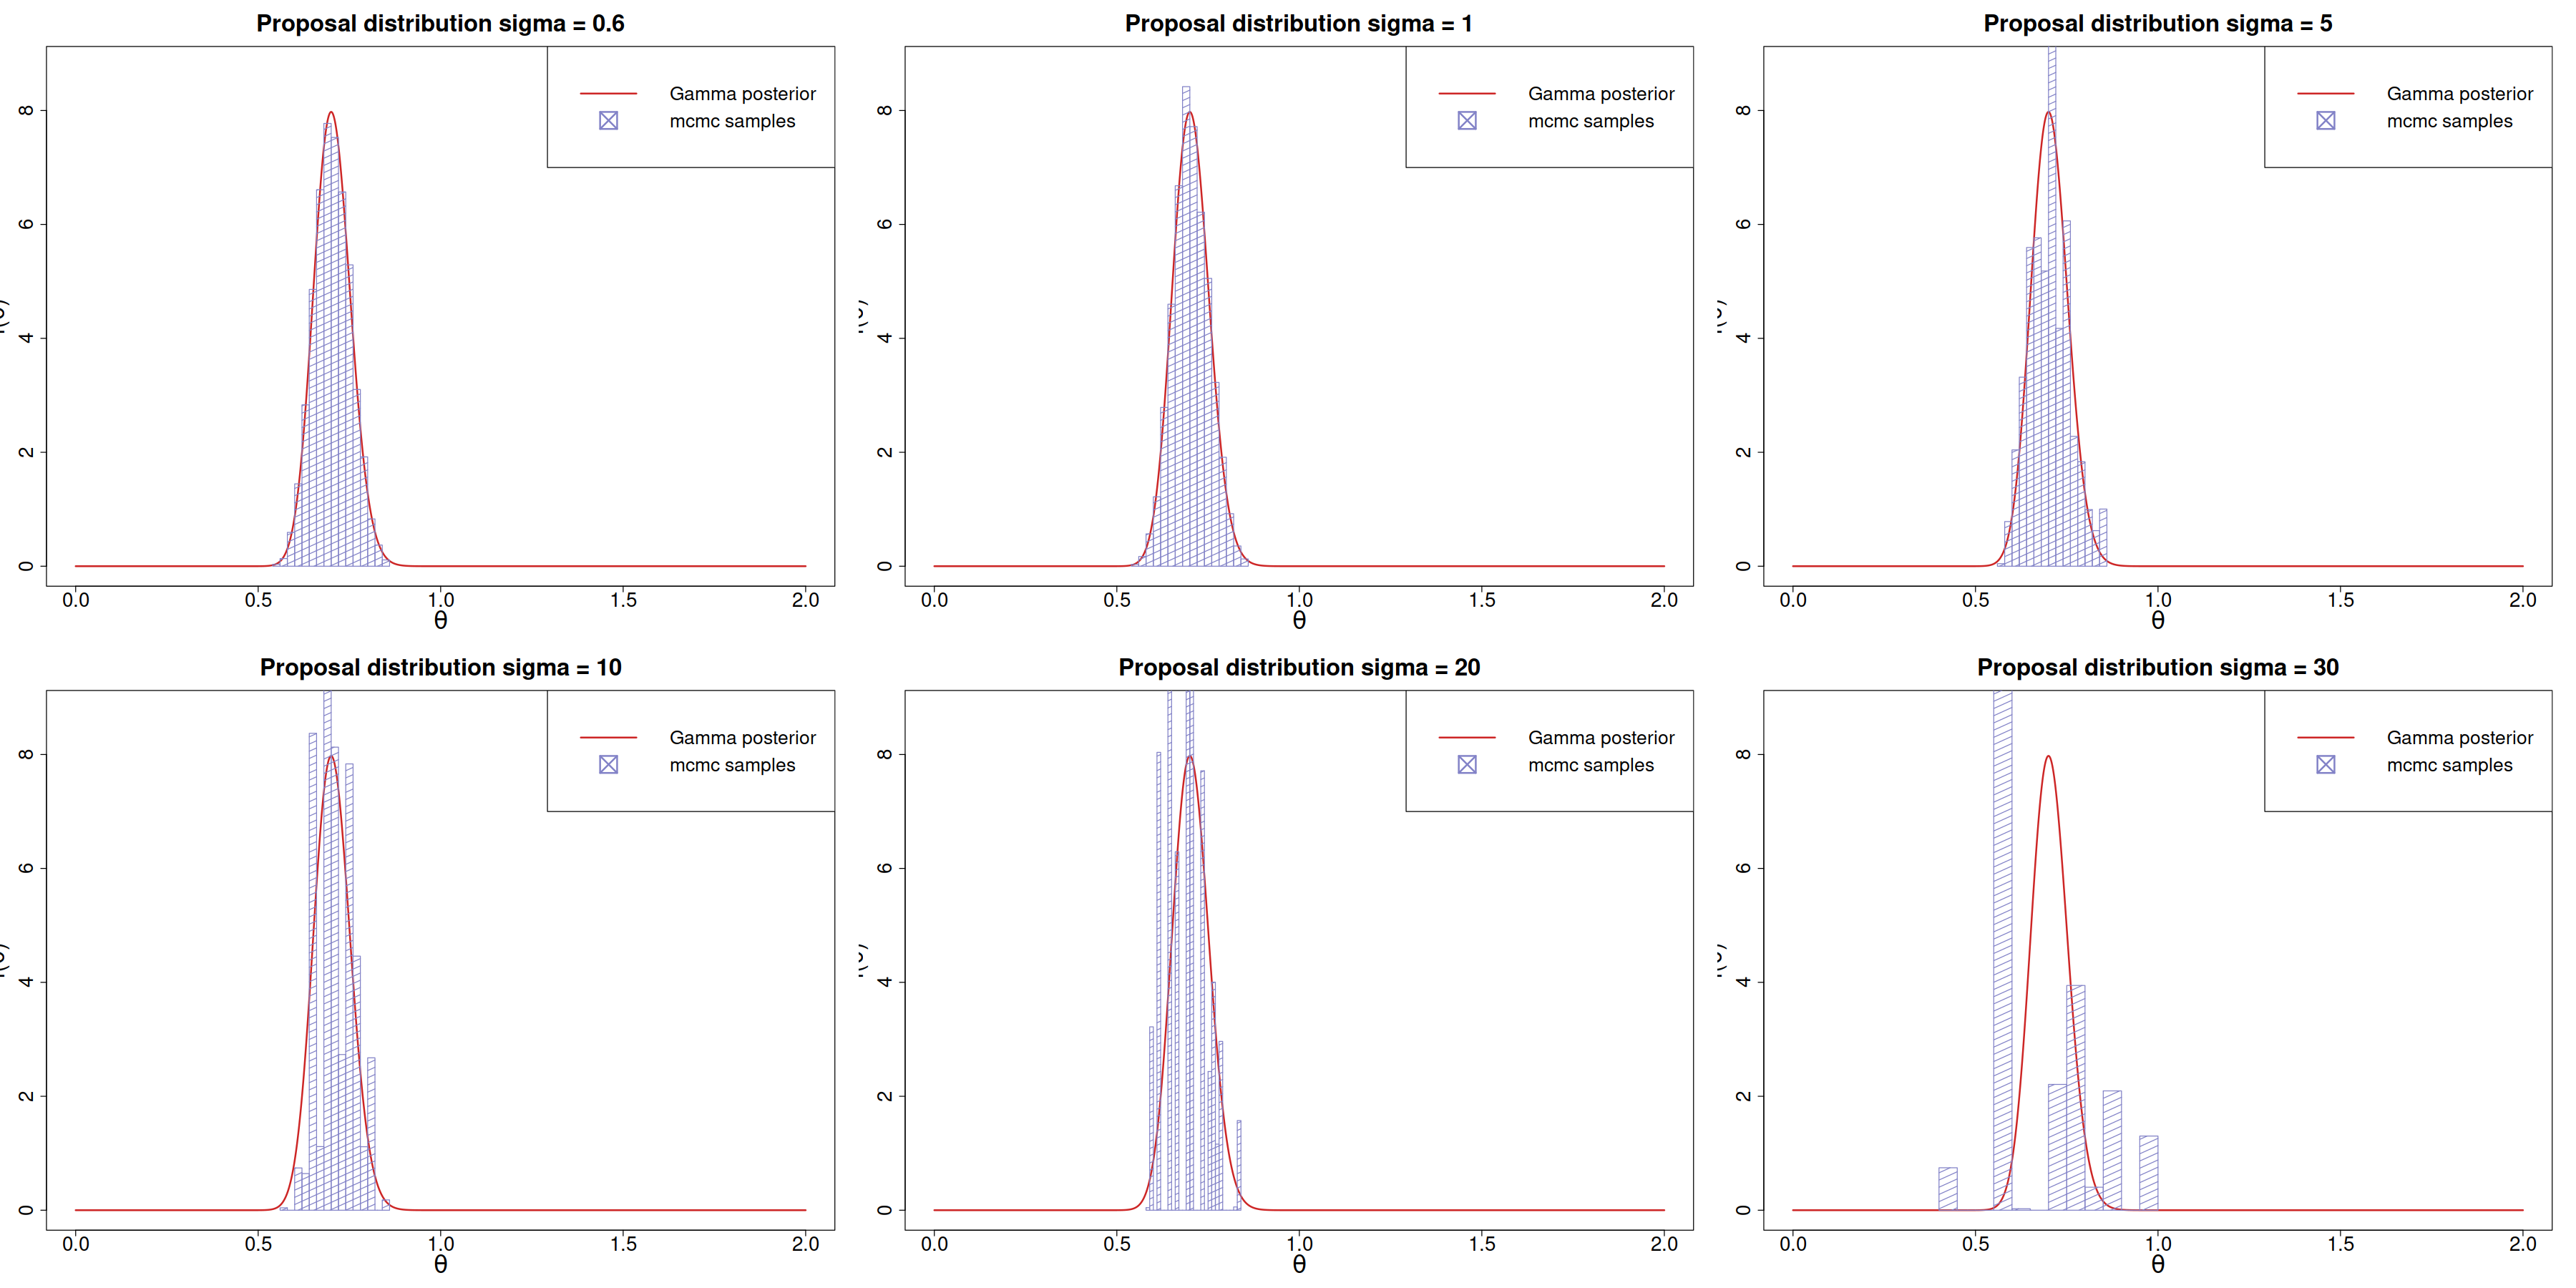

In [15]:
x = seq(0, 2, length.out=10**4)

testfunc = function(theta) {
    return(dgamma(x = theta, shape = 1 + sum(obs_flatten2), rate = n2))
}

y = testfunc(x)

par(mfrow=c(2,3))
options(repr.plot.width=30, repr.plot.height=15)

cols = c('#2eaf17', '#8282c7', '#d95416', '#cc54dc', '#e0e015')
for (i in 1:ncol(chains2)) {
    plot(x, y, type='l', lwd=2, ylim = c(0, 1.1 * max(y)), col='firebrick3', main = paste('Proposal distribution', expression(sigma), '=', sample_sig[i]),
        xlab=expression(theta), ylab=expression(paste('f(',theta ,')', sep='')), cex.axis = 2.1, cex.lab = 2.5, cex.main = 2.5)
    hist(chains2[,i], breaks = 'sturges', freq = FALSE, density = 50, col = '#8282c7', add = TRUE)
    legend('topright', legend = c('Gamma posterior', 'mcmc samples'), col = c('firebrick3', '#8282c7'),
        lty = c(1, NA), lwd = c(2, 2), pch = c(NA, 7), cex = 2, seg.len = 0.5, text.width = 0.3, x.intersp = 0.3, y.intersp = 0.4, pt.cex = 4)
}
cat('---------------- SECOND MEASUREMENT SAMPLE HISTOGRAMS WITH VARIABLE PROPOSAL SIGMA ----------------\n')

The previous observatiosn are backed also by what emerges from the analysis of the autocorrelation of the chains. Indeed, for both measurements it is possible to see that for small $\sigma$ the autocorrelation function (ACF) drops rapidly to zero as the lag increases. This is the expected behaviour for a good chain that has converged. As $\sigma$ increases the ACF becomes more and more squeezed to 1, and this is the sign that very few actual points are sampled from the posterior distribution, because many of them are rejected. In other words this means that, starting from one parameter, we will know the next with a very strong confidence, since other proposals would be rejected. 

---------------- FIRST MEASUREMENT ACF PLOTS ----------------


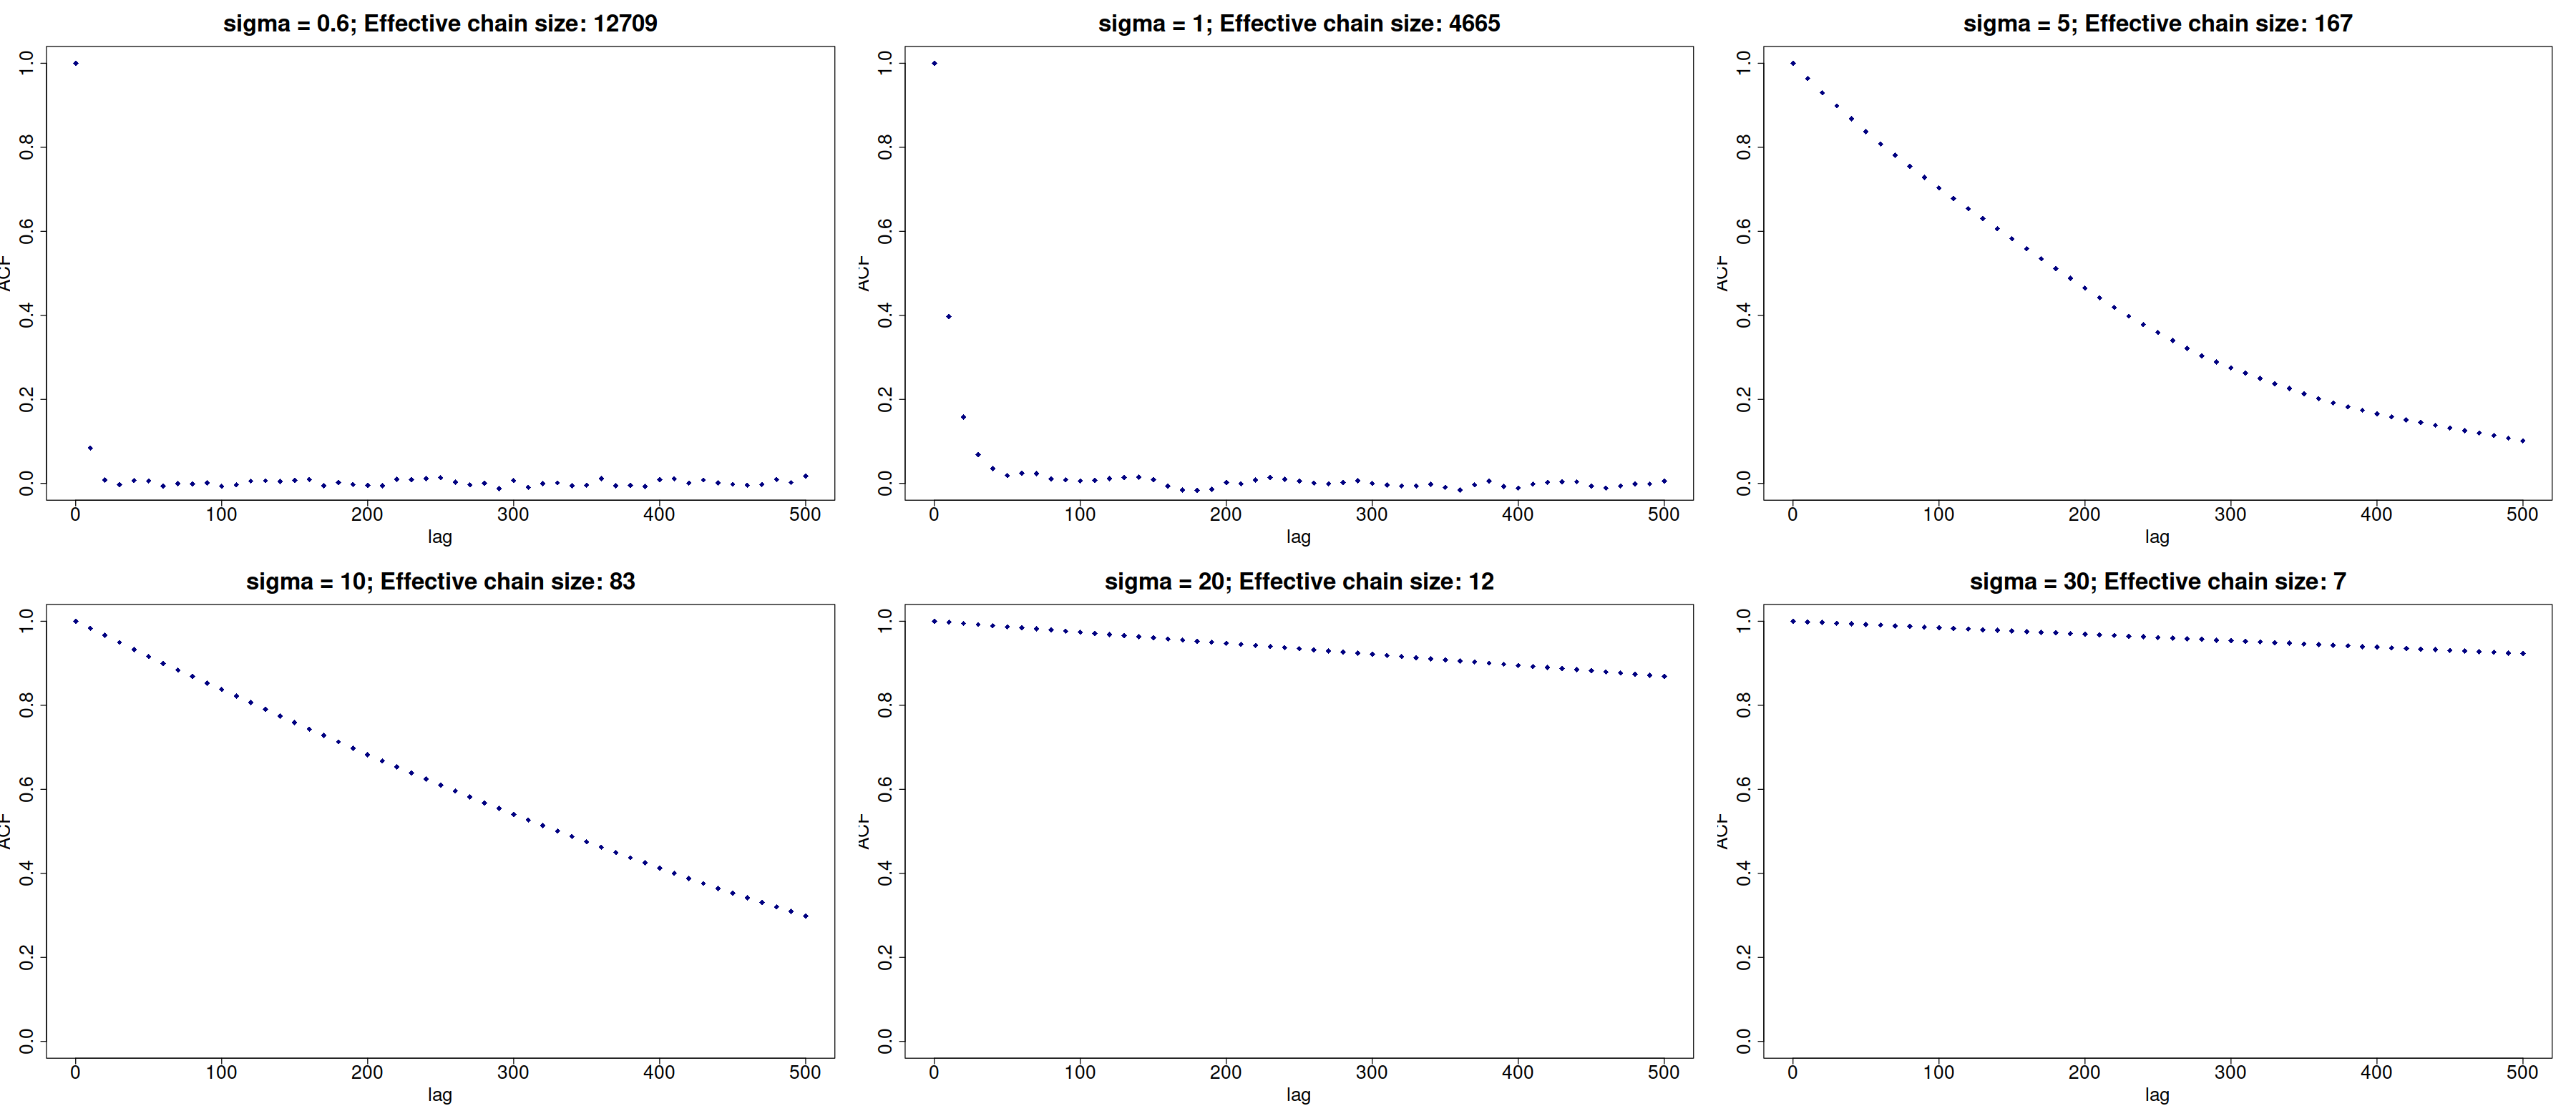

In [16]:
par(mfrow=c(2,3))
options(repr.plot.width=30, repr.plot.height=13)

lags = seq(0, 500, 10)
for (i in 1:ncol(chains1)) {
    c_chain1 = as.mcmc(na.omit(chains1[,i]))
    acf1 = autocorr(c_chain1, lags=lags)
    plot(lags, acf1, ylim=c(0,1), pch=18, col='navy', xlab='lag', ylab='ACF', cex=1.3, cex.axis = 2, cex.lab = 2, 
        main = paste('sigma = ', sample_sig[i], '; Effective chain size: ', as.integer(effectiveSize(c_chain1)), sep = ''), cex.main = 2.5)
}
cat('---------------- FIRST MEASUREMENT ACF PLOTS ----------------\n')

---------------- SECOND MEASUREMENT ACF PLOTS ----------------


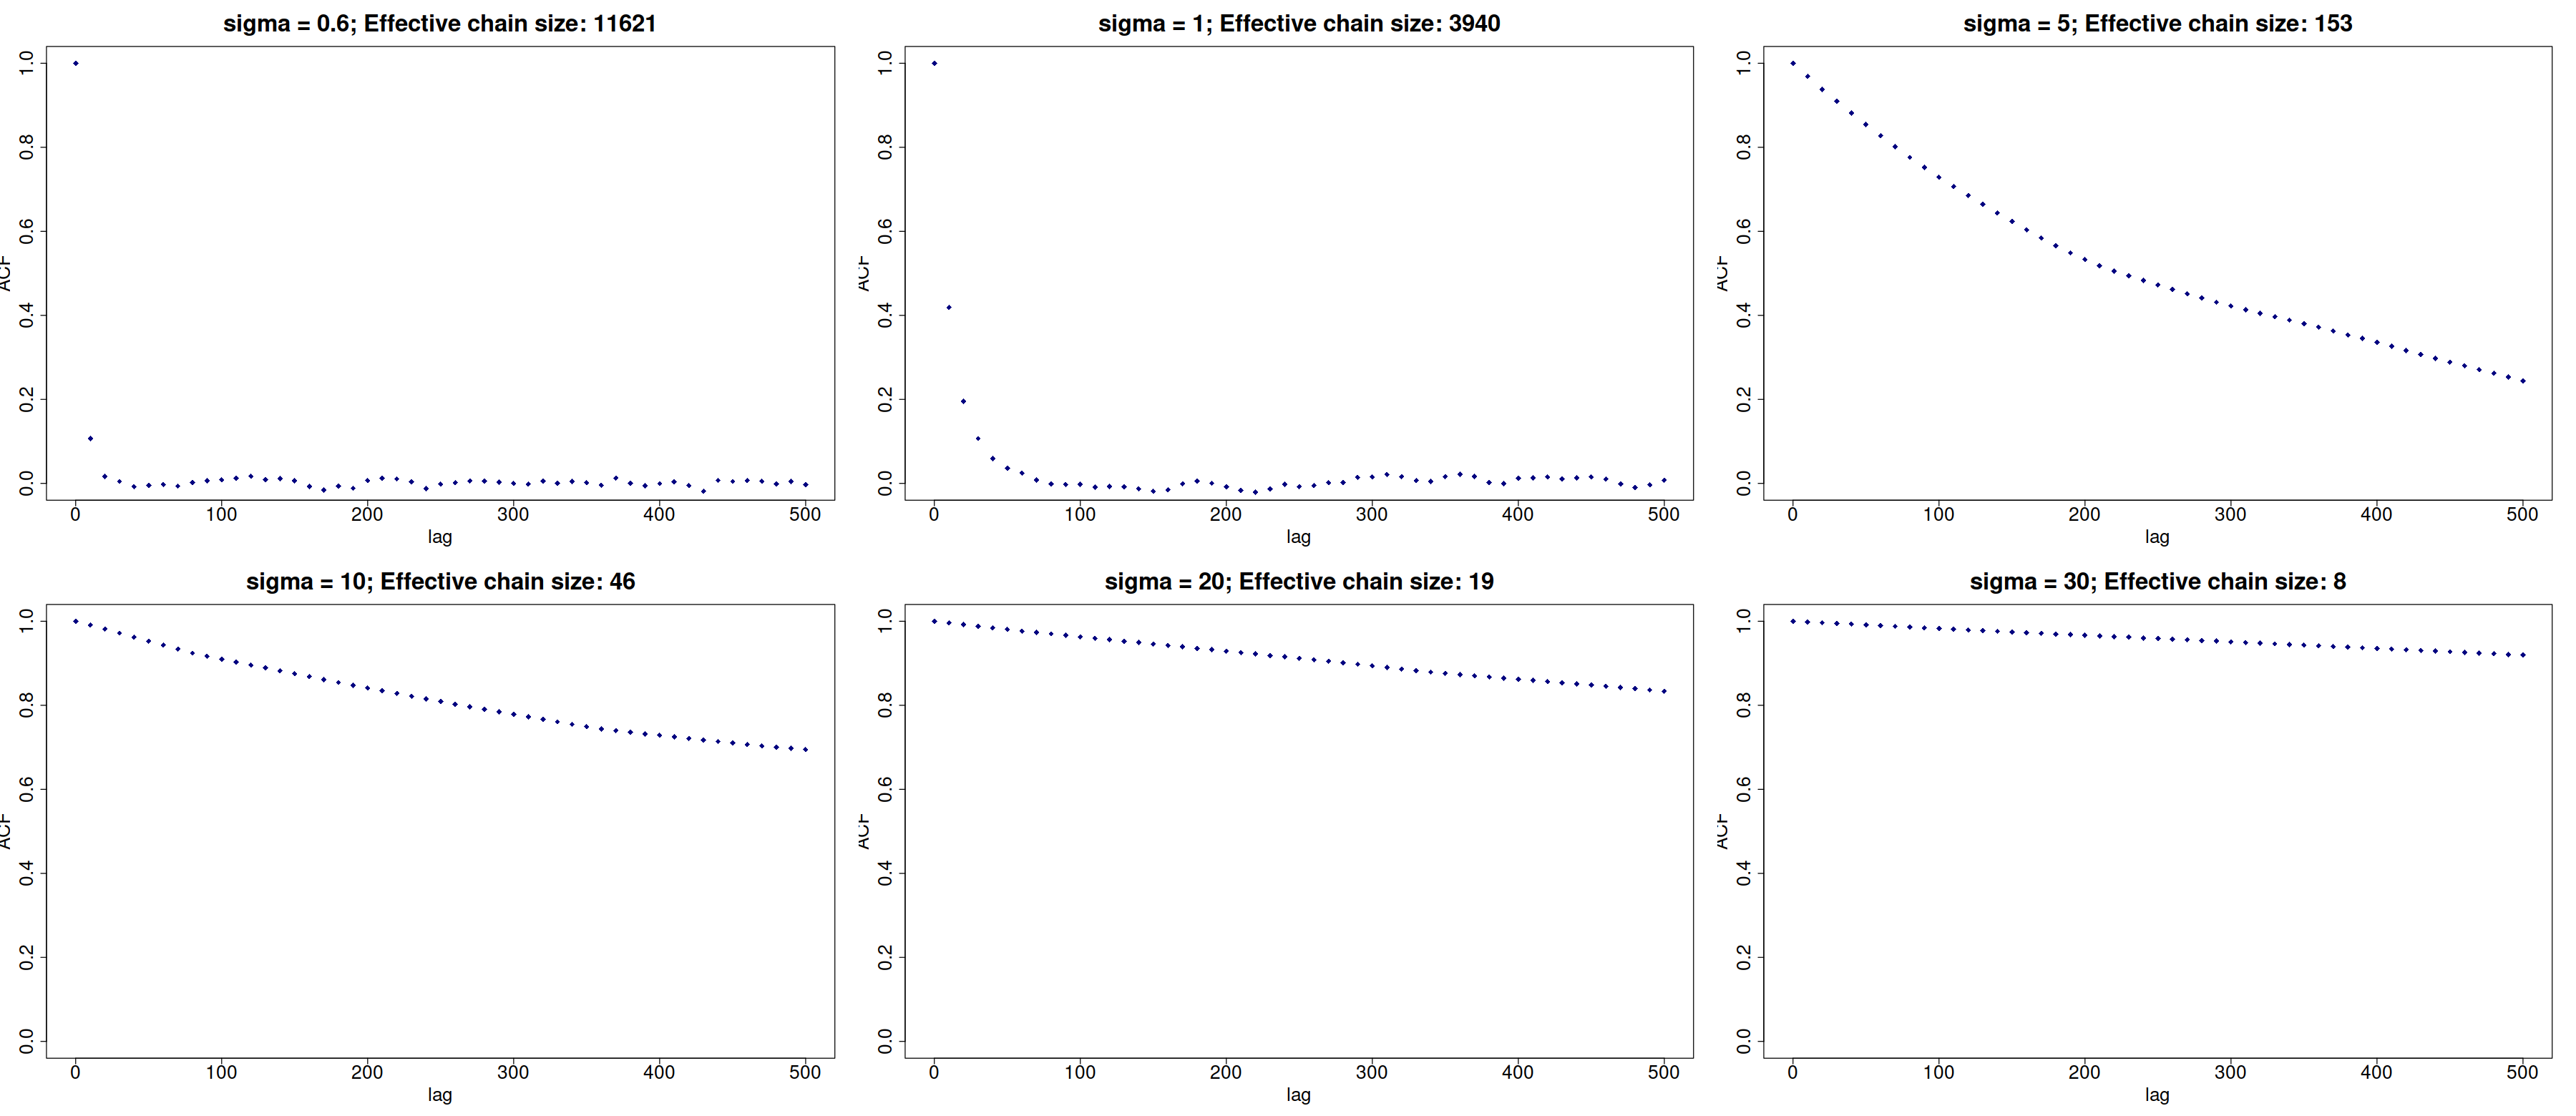

In [17]:
par(mfrow=c(2,3))

lags = seq(0, 500, 10)
for (i in 1:ncol(chains2)) {
    c_chain2 = as.mcmc(na.omit(chains2[,i]))
    acf2 = autocorr(c_chain2, lags=lags)
    plot(lags, acf2, ylim=c(0,1), pch=18, col='navy', xlab='lag', ylab='ACF', cex=1.3, cex.axis = 2, cex.lab = 2, 
        main = paste('sigma = ', sample_sig[i], '; Effective chain size: ', as.integer(effectiveSize(c_chain2)), sep = ''), cex.main = 2.5)
}
cat('---------------- SECOND MEASUREMENT ACF PLOTS ----------------\n')

Now that we have understood the optimal parameters for our MCMC function we set $\sigma = 0.6$ and calculate the required statistics for the posterior samples, for both set of measurements.

In [18]:
############### FIRST MEASUREMENT ############### 
mean_unif1 = mean(chains1[,1], na.rm = TRUE)
median_unif1 = unname(quantile(chains1[,1], probs = 0.5, na.rm = TRUE))
variance_unif1 = sd(chains1[,1], na.rm = TRUE) ** 2

lower_unif1 = unname(quantile(chains1[,1], probs = 0.025, na.rm = TRUE))
upper_unif1 = unname(quantile(chains1[,1], probs = 0.975, na.rm = TRUE))

cat('-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif1, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif1, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif1, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif1, digits = 3), ', ', format(upper_unif1, digits = 3), ')', sep = '', '\n')

-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------
mean: 0.6154
median: 0.614
variance: 0.00299
posterior 95% c.i.: (0.512, 0.728)


In [19]:
############### SECOND MEASUREMENT ############### 
mean_unif2 = mean(chains2[,1], na.rm = TRUE)
median_unif2 = unname(quantile(chains2[,1], probs = 0.5, na.rm = TRUE))
variance_unif2 = sd(chains2[,1], na.rm = TRUE) ** 2

lower_unif2 = unname(quantile(chains2[,1], probs = 0.025, na.rm = TRUE))
upper_unif2 = unname(quantile(chains2[,1], probs = 0.975, na.rm = TRUE))

cat('-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif2, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif2, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif2, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif2, digits = 3), ', ', format(upper_unif2, digits = 3), ')', sep = '', '\n')

-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------
mean: 0.703
median: 0.702
variance: 0.00244
posterior 95% c.i.: (0.609, 0.801)


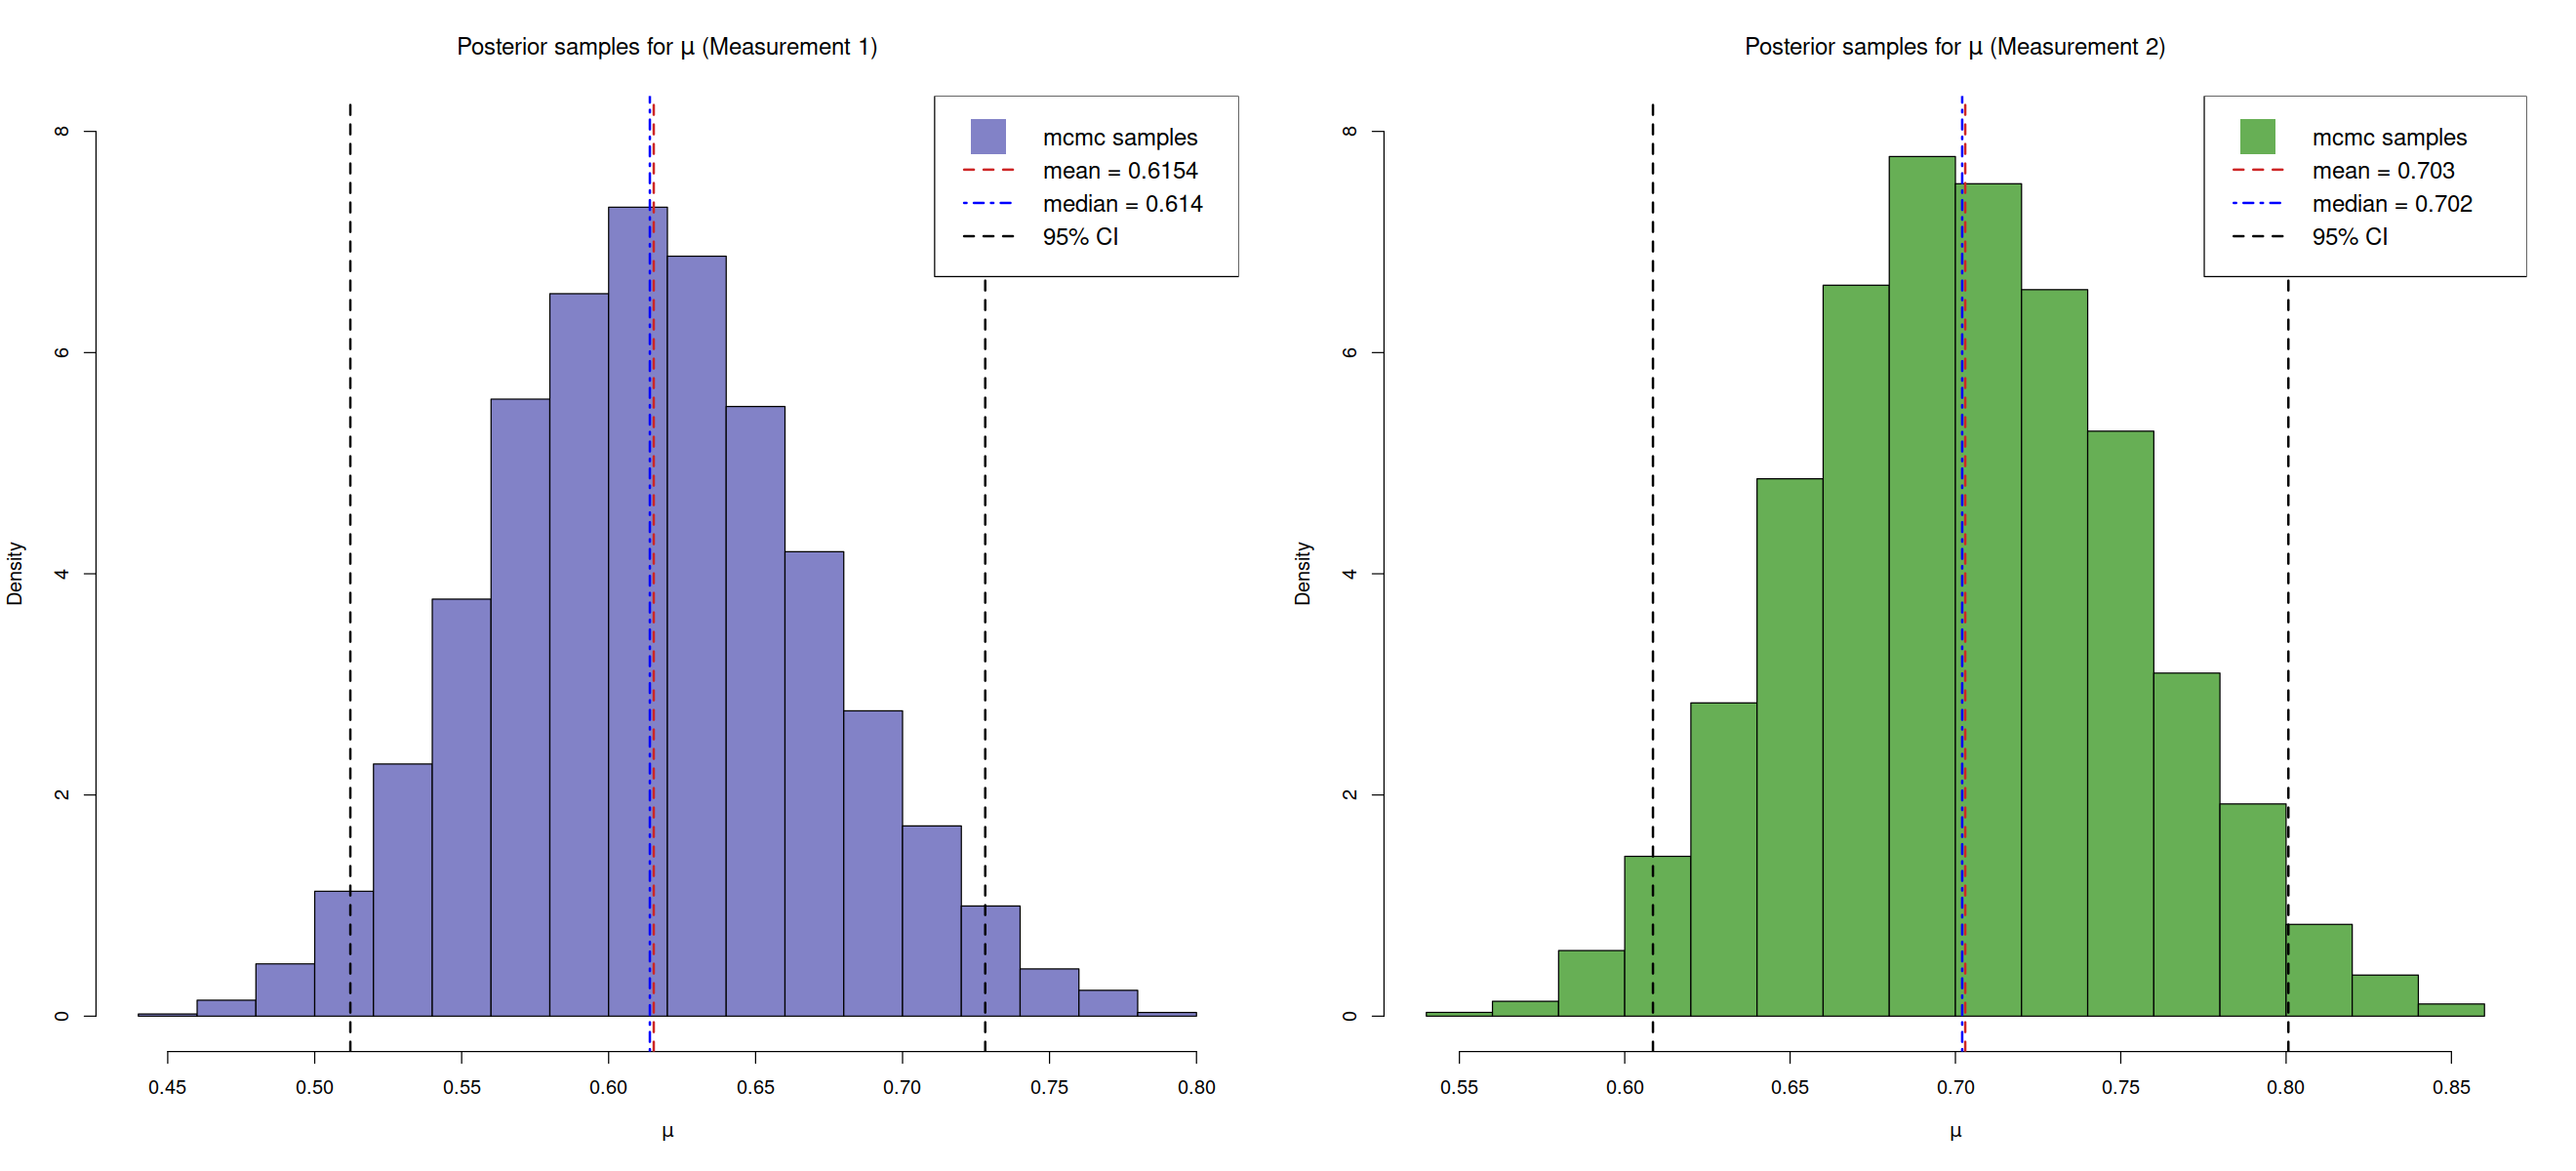

In [20]:
options(repr.plot.width=22, repr.plot.height=10)
par(mfrow = c(1, 2))

hist(chains1[,1], breaks = 'sturges', freq = FALSE, col = '#8282c7', ylim = c(0, 8), xlab = expression(mu), main = expression(paste('Posterior samples for ', mu, ' (Measurement 1)')))
abline(v = mean_unif1, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif1, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif1, upper_unif1), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('mcmc samples', paste('mean =', format(mean_unif1, digits = 4)), paste('median =', format(median_unif1, digits = 4)), '95% CI'), 
        col = c('#8282c7', 'firebrick3', 'blue', 'black'),
        lty = c(NA, 2, 4, 2), lwd = c(NA, 2, 2, 2), pch = c(15, NA, NA, NA), cex = 1.2, seg.len = 0.5, text.width = 0.05, x.intersp = 0.3, y.intersp = 0.7, pt.cex = 4)

hist(chains2[,1], breaks = 'sturges', freq = FALSE, col = '#67af55', ylim = c(0, 8), xlab = expression(mu), main = expression(paste('Posterior samples for ', mu, ' (Measurement 2)')))
abline(v = mean_unif2, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif2, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif2, upper_unif2), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('mcmc samples', paste('mean =', format(mean_unif2, digits = 4)), paste('median =', format(median_unif2, digits = 4)), '95% CI'), 
        col = c('#67af55', 'firebrick3', 'blue', 'black'),
        lty = c(NA, 2, 4, 2), lwd = c(NA, 2, 2, 2), pch = c(15, NA, NA, NA), cex = 1.2, seg.len = 0.5, text.width = 0.05, x.intersp = 0.3, y.intersp = 0.7, pt.cex = 4)

## MCMC sampling of the posterior starting from a Jeffrey's prior

In the case of Jeffrey's prior we set directly $\sigma = 0.6$ and calculate the required statistics.

In [21]:
chains1 = rep(NA, n_sample)
chains2 = rep(NA, n_sample)
sample_sig = 0.6

Here we run the MCMC for the two set of measurements.

In [22]:
testfunc = function(theta) {
    return(dgamma(x = theta, shape = 0.5 + sum(obs_flatten1), rate = n1))
}

testfunc_metropolis = function(theta) {
    return(log10(testfunc(theta)))
}

chains1 = metropolis_1dim(func=testfunc_metropolis, theta_init = theta_init, n_sample = n_sample, sigma = sample_sig ** 2)[,2]

testfunc = function(theta) {
    return(dgamma(x = theta, shape = 0.5 + sum(obs_flatten2), rate = n2))
}

testfunc_metropolis = function(theta) {
    return(log10(testfunc(theta)))
}

chains2 = metropolis_1dim(func=testfunc_metropolis, theta_init = theta_init, n_sample = n_sample, sigma = sample_sig ** 2)[,2]


Let's check the ACF of the two chains.

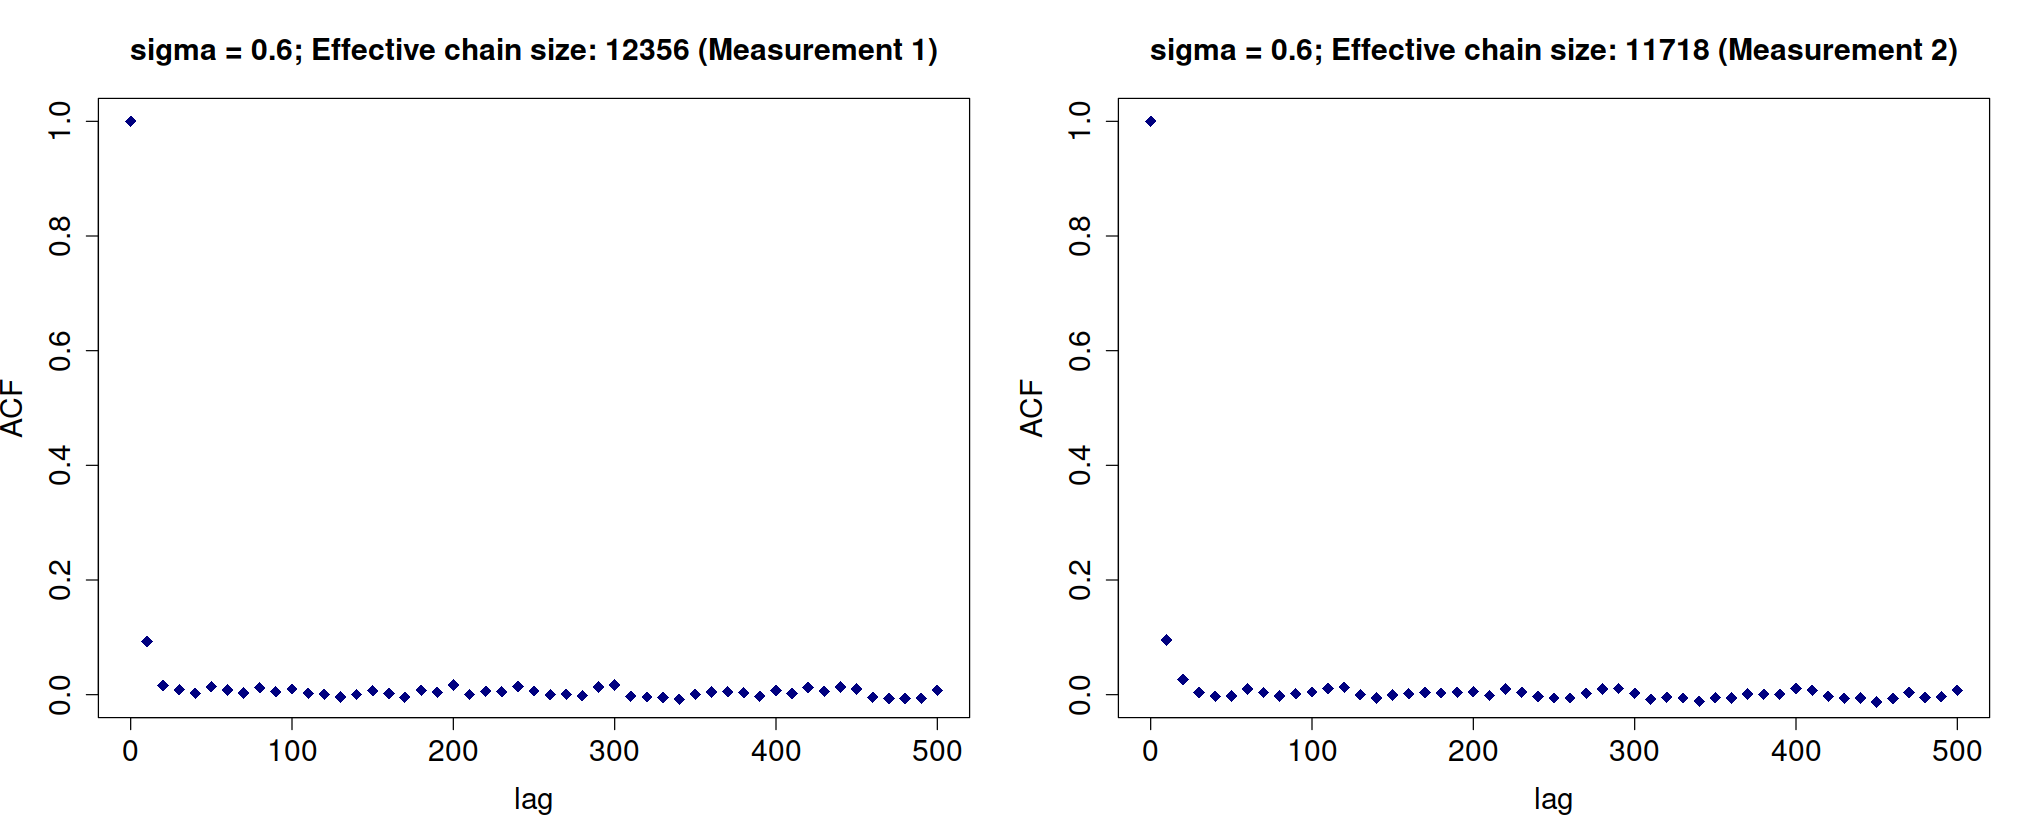

In [23]:
lags = seq(0, 500, 10)
c_chain1 = as.mcmc(na.omit(chains1))
acf1 = autocorr(c_chain1, lags=lags)
c_chain2 = as.mcmc(na.omit(chains2))
acf2 = autocorr(c_chain2, lags=lags)

options(repr.plot.width=17, repr.plot.height=7)
par(mfrow = c(1, 2))
plot(lags, acf1, ylim=c(0,1), pch=18, col='navy', xlab='lag', ylab='ACF', cex=1.3, cex.axis = 1.5, cex.lab = 1.5, 
    main = paste('sigma = ', sample_sig, '; Effective chain size: ', as.integer(effectiveSize(c_chain1)), ' (Measurement 1)', sep = ''), cex.main = 1.5)
plot(lags, acf2, ylim=c(0,1), pch=18, col='navy', xlab='lag', ylab='ACF', cex=1.3, cex.axis = 1.5, cex.lab = 1.5, 
    main = paste('sigma = ', sample_sig, '; Effective chain size: ', as.integer(effectiveSize(c_chain2)), ' (Measurement 2)', sep = ''), cex.main = 1.5)

In [24]:
############### FIRST MEASUREMENT ############### 
mean_unif1 = mean(chains1, na.rm = TRUE)
median_unif1 = unname(quantile(chains1, probs = 0.5, na.rm = TRUE))
variance_unif1 = sd(chains1, na.rm = TRUE) ** 2

lower_unif1 = unname(quantile(chains1, probs = 0.025, na.rm = TRUE))
upper_unif1 = unname(quantile(chains1, probs = 0.975, na.rm = TRUE))

cat('-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif1, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif1, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif1, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif1, digits = 3), ', ', format(upper_unif1, digits = 3), ')', sep = '', '\n')

-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (FIRST MEASUREMENT) --------
mean: 0.6122
median: 0.6098
variance: 0.00302
posterior 95% c.i.: (0.512, 0.726)


In [25]:
############### SECOND MEASUREMENT ############### 
mean_unif2 = mean(chains2, na.rm = TRUE)
median_unif2 = unname(quantile(chains2, probs = 0.5, na.rm = TRUE))
variance_unif2 = sd(chains2, na.rm = TRUE) ** 2

lower_unif2 = unname(quantile(chains2, probs = 0.025, na.rm = TRUE))
upper_unif2 = unname(quantile(chains2, probs = 0.975, na.rm = TRUE))

cat('-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------\n', sep = '')
cat('mean: ', format(mean_unif2, digits = 4), sep = '', '\n')
cat('median: ', format(median_unif2, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif2, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif2, digits = 3), ', ', format(upper_unif2, digits = 3), ')', sep = '', '\n')

-------- POSTERIOR SAMPLES FROM UNIFORM PRIOR (SECOND MEASUREMENT) --------
mean: 0.7016
median: 0.7002
variance: 0.00249
posterior 95% c.i.: (0.607, 0.801)


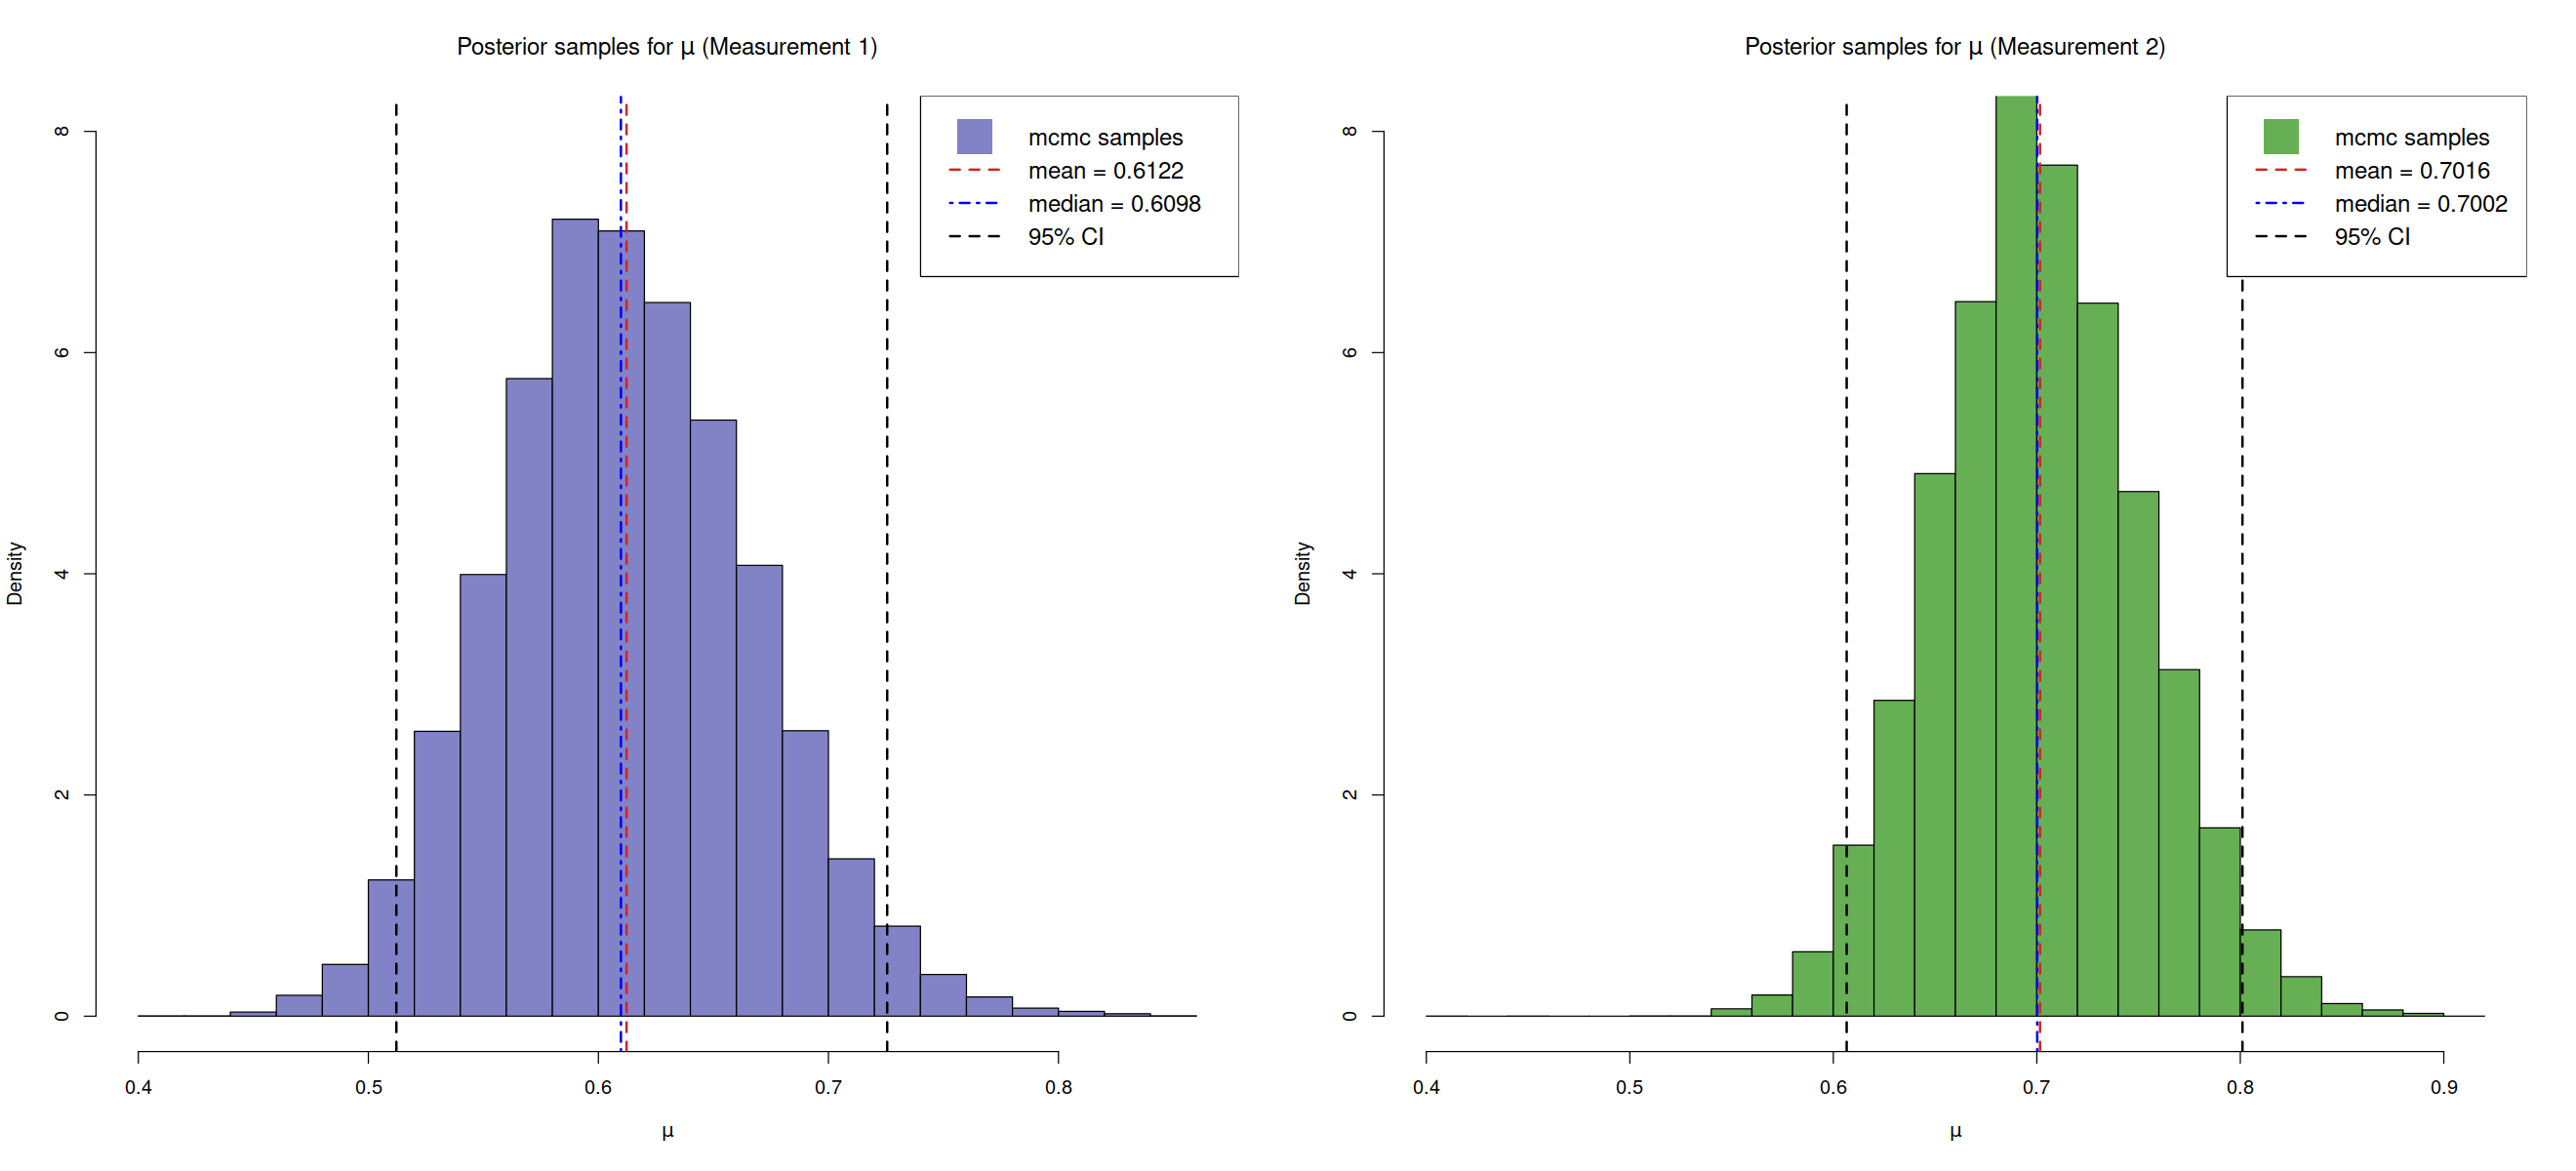

In [26]:
options(repr.plot.width=22, repr.plot.height=10)
par(mfrow = c(1, 2))

hist(chains1, breaks = 'sturges', freq = FALSE, col = '#8282c7', ylim = c(0, 8), xlab = expression(mu), main = expression(paste('Posterior samples for ', mu, ' (Measurement 1)')))
abline(v = mean_unif1, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif1, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif1, upper_unif1), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('mcmc samples', paste('mean =', format(mean_unif1, digits = 4)), paste('median =', format(median_unif1, digits = 4)), '95% CI'), 
        col = c('#8282c7', 'firebrick3', 'blue', 'black'),
        lty = c(NA, 2, 4, 2), lwd = c(NA, 2, 2, 2), pch = c(15, NA, NA, NA), cex = 1.2, seg.len = 0.5, text.width = 0.07, x.intersp = 0.3, y.intersp = 0.7, pt.cex = 4)

hist(chains2, breaks = 20, freq = FALSE, col = '#67af55', ylim = c(0, 8), xlab = expression(mu), main = expression(paste('Posterior samples for ', mu, ' (Measurement 2)')))
abline(v = mean_unif2, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = median_unif2, col = 'blue', lty = 4, lwd = 2)
abline(v = c(lower_unif2, upper_unif2), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('mcmc samples', paste('mean =', format(mean_unif2, digits = 4)), paste('median =', format(median_unif2, digits = 4)), '95% CI'), 
        col = c('#67af55', 'firebrick3', 'blue', 'black'),
        lty = c(NA, 2, 4, 2), lwd = c(NA, 2, 2, 2), pch = c(15, NA, NA, NA), cex = 1.2, seg.len = 0.5, text.width = 0.07, x.intersp = 0.3, y.intersp = 0.7, pt.cex = 4)

# Exercise 3

- A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n = 116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y = 11$ had a high bacter X level.
- Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter X level

### Request (a)
Find the frequentist estimator for $p$.

In [27]:
n = 116
y = 11

# unbiased frequentist estimator
p_freq = y / n
cat('The frequentist estimator for p is y / n = ', format(p_freq, digits = 3), sep = '', '\n')

The frequentist estimator for p is y / n = 0.0948


### Request (b) - Request(c)
(b) Using a Beta(1,10) prior for $p$, calculate the posterior distribution $P(p|y)$ <br>
(c) Find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval.

-------- BETA POSTERIOR FROM BETA(1,10) PRIOR --------
mean: 0.0945
median: 0.0924
mode: 0.0881
variance: 0.000668
posterior 95% c.i.: (0.0502, 0.151)


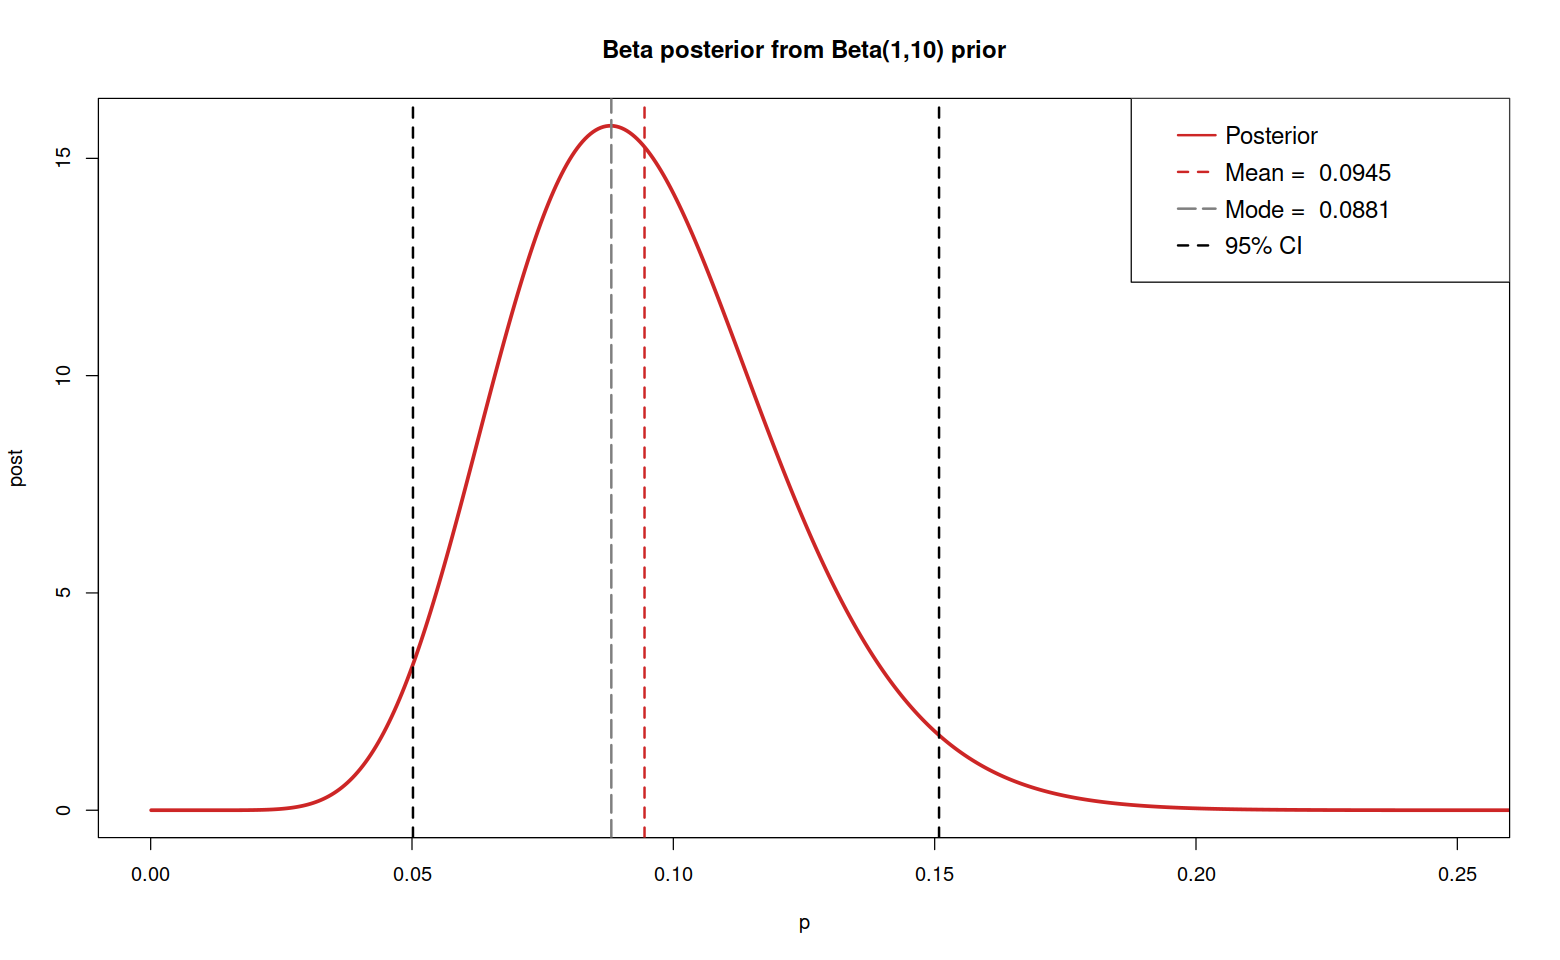

In [28]:
alpha = 1
beta = 10

p = seq(from = 1e-4, to = 1, length.out = 2000)
delta_p = p[2] - p[1]
alpha_p = alpha + y
beta_p = beta + n - y
post = dbeta(p, alpha_p, beta_p)
mean_post = sum(p * post) * delta_p
median_post = qbeta(0.5, alpha_p, beta_p)
mode_post = p[which.max(post)]
variance_post = sum((p - mean_post) ** 2 * post) * delta_p

lower = qbeta(p = 0.025, alpha + y, beta + n - y)
upper = qbeta(p = 0.975, alpha + y, beta + n - y)

cat(paste('-------- BETA POSTERIOR FROM BETA(', alpha, ',', beta, ') PRIOR --------\n', sep = ''))
cat('mean: ', format(mean_post, digits = 3), sep = '', '\n')
cat('median: ', format(median_post, digits = 3), sep = '', '\n')
cat('mode: ', format(mode_post, digits = 3), sep = '', '\n')
cat('variance: ', format(variance_post, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower, digits = 3), ', ', format(upper, digits = 3), ')', sep = '', '\n')

################ PLOT OPTIONS ################
options(repr.plot.width=13, repr.plot.height=8)
plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha, ',', beta, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI'),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black'), 
        lty = c(1, 2, 5, 2), lwd = 2, cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

### Request (d)
Test the hypothesis

$$
H_0 \, : \, p = 0.1 \, \text{versus} \, H_1 \, : \, p \neq 0.1
$$

at 5% level of significance with both the frequentist and bayesian approach.

**Bayesian approach**: we take the previous plot for the Beta posterior and add a vertical line representing the probability assumed for the null hypothesis (that is NOT the probability of the null hypothesis in a strict sense). We see that the line corresponding to ```p_null``` lies into the 95% credibility interval, so we accept the null hypothesis $H_0$.

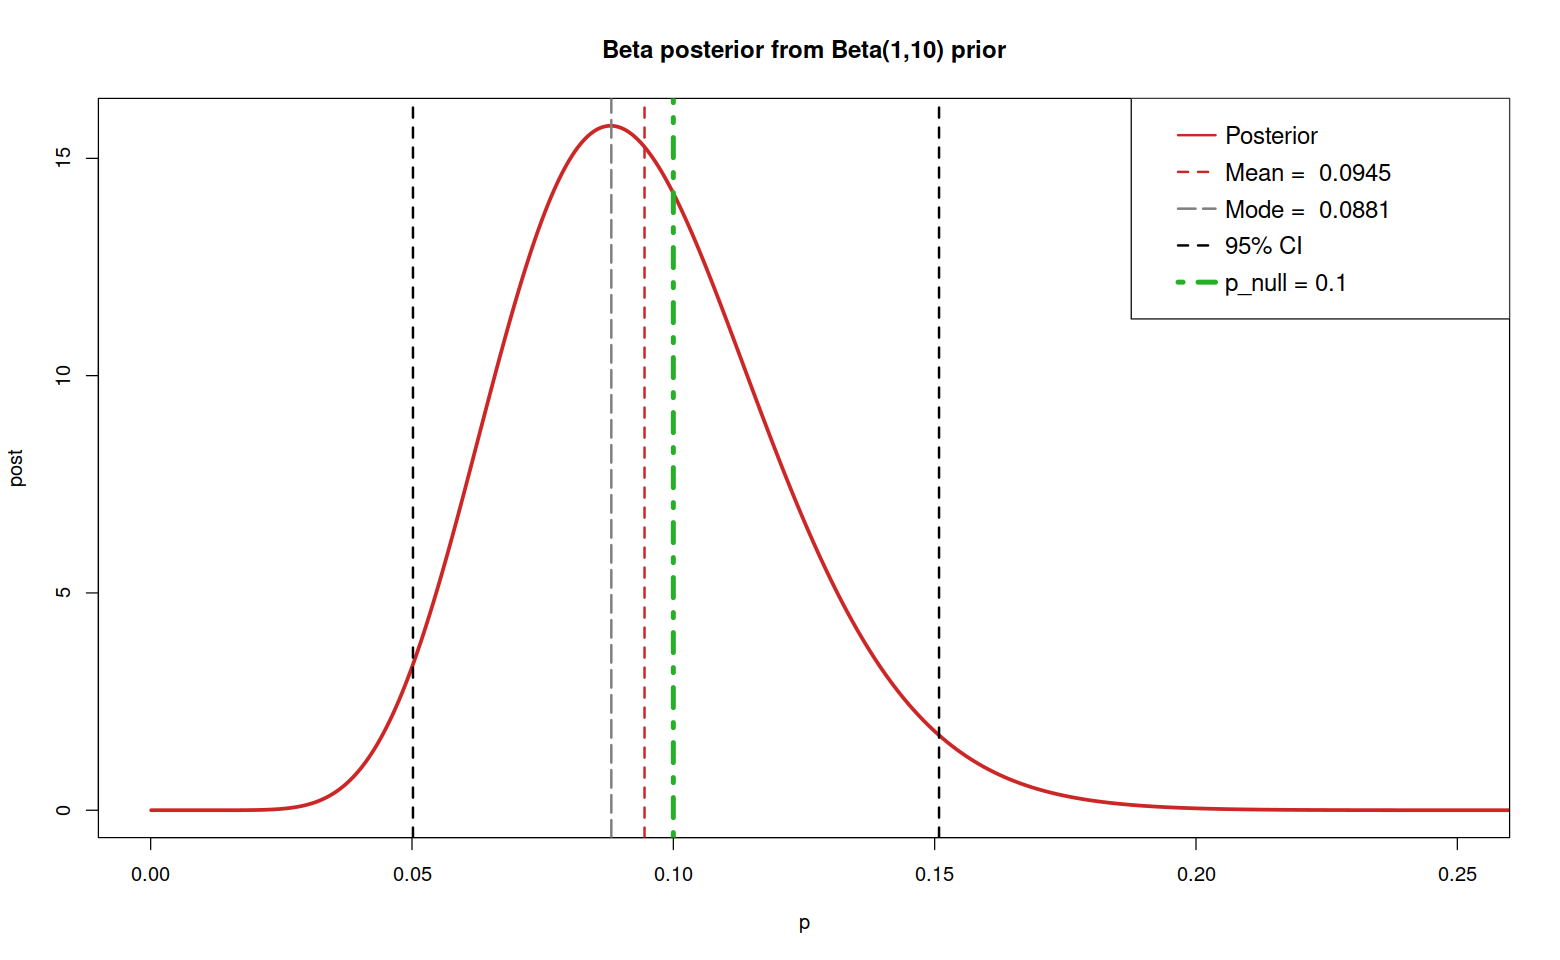

In [29]:
p_null = 0.1

plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha, ',', beta, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
abline(v = p_null, col = '#27b027', lty = 4, lwd = 4)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI', paste('p_null =', p_null)),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black', '#27b027'), 
        lty = c(1, 2, 5, 2, 4), lwd = c(2, 2, 2, 2, 4), cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

**Frequentist approach**: assuming $H_0$ as true we plot the binomial PDF setting $p = p_0 = 0.1$. Then we identify the rejection zone, i.e. the bars in the barplot that summed up give approximately the 5% of the total possible outcomes. Then we see where the bar corresponding to the given observation lies: in this case it lies into the acceptance region, so even the frequentist hypothesis testing states that we can not reject the null hypothesis.

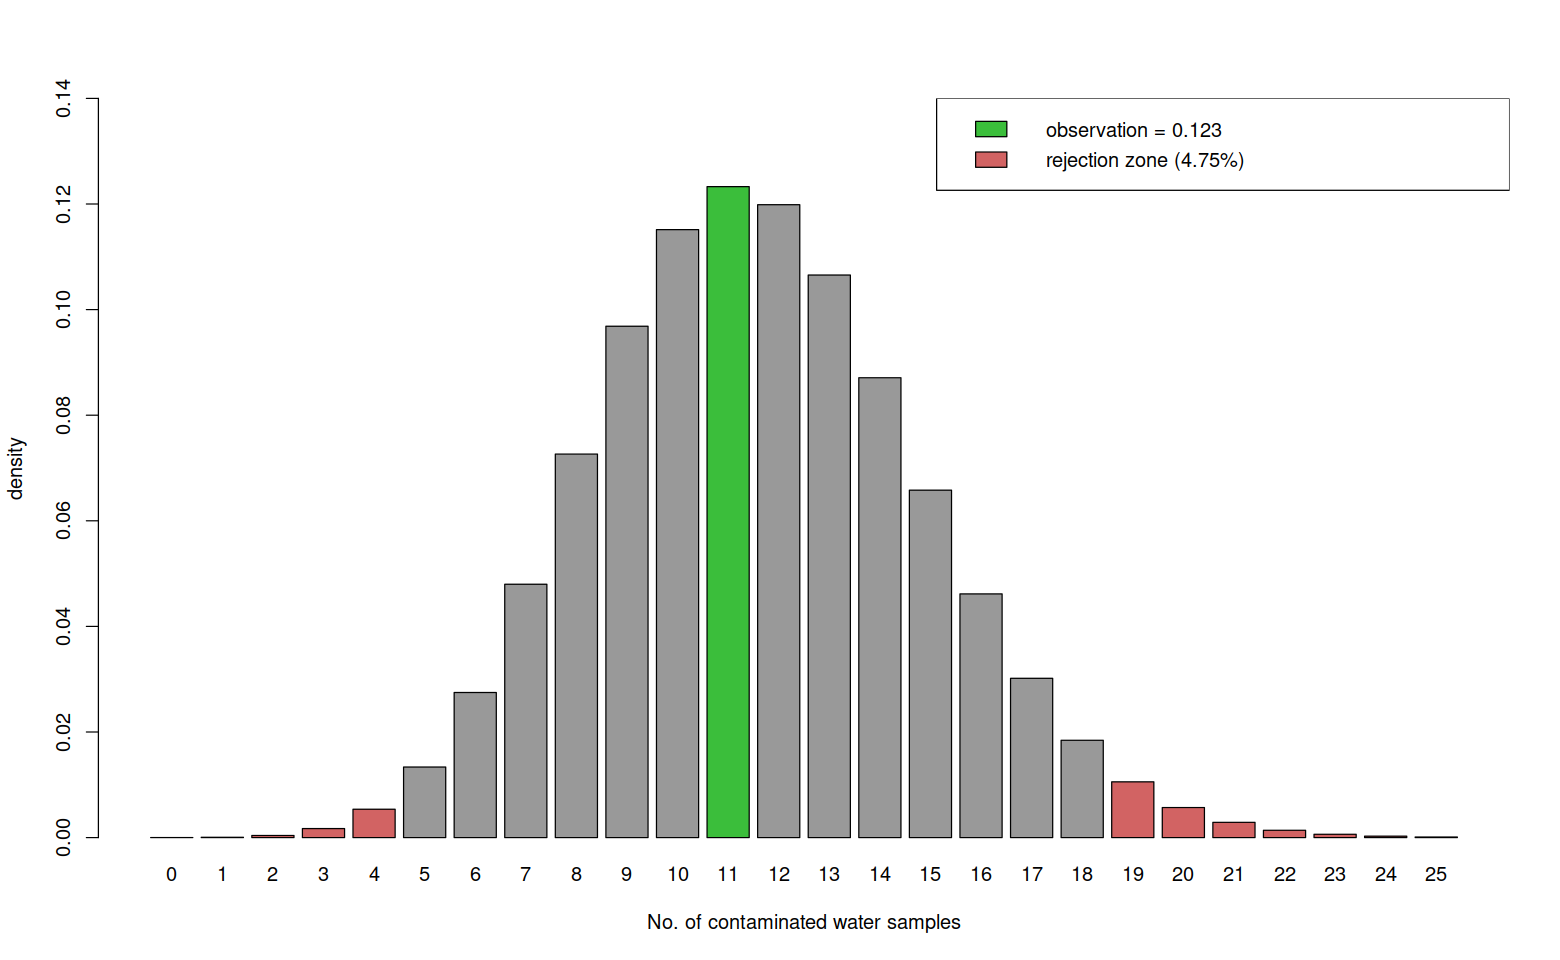

In [30]:
y_possible = 0:25
null_pdf = dbinom(x = y_possible, size = n, prob = p_null)
p_value = null_pdf[y + 1]

sig_level = sum(null_pdf[1:5]) + sum(null_pdf[19:26])

barplot(null_pdf, names.arg = y_possible, ylim = c(0, 0.14), xlab = 'No. of contaminated water samples', ylab = 'density',
        col = c(rep('#d26363',5), rep('grey60',6),'#3bbe3b', rep('grey60', 7), rep('#d26363',7)))
legend('topright', legend = c(paste('observation =', format(p_value, digits = 3)), paste('rejection zone (', format(100 * sig_level, digits = 3), '%)', sep = '')), 
        fill = c('#3bbe3b', '#d26363'))

- a new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter X level.

### Request (e)
Find the frequentist estimator for $p$.

In [31]:
n = 165
y = 9

# unbiased frequentist estimator
p_freq = y / n
cat('The frequentist estimator for p is y / n = ', format(p_freq, digits = 3), sep = '', '\n')

The frequentist estimator for p is y / n = 0.0545


### Request (f) - Request (g) - Request (h)
(f) Using a Beta(1,10) prior for $p$, calculate the posterior distribution $P(p|y)$ <br>
(g) Find the bayesian estimator for $p$, assuming both a Beta(1,10) prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one. <br>
(h) Test the hypothesis

$$
H_0 \, : \, p = 0.1 \, \text{versus} \, H_1 \, : \, p \neq 0.1
$$

at 5% level of significance with both the frequentist and bayesian approach.

In the following cell we **find the posterior for $p$ assuming a Beta(1,10) as prior**.

-------- BETA POSTERIOR FROM BETA(1,10) PRIOR --------
mean: 0.0568
mode: 0.0516
variance: 0.000303
posterior 95% c.i.: (0.0277, 0.0954)


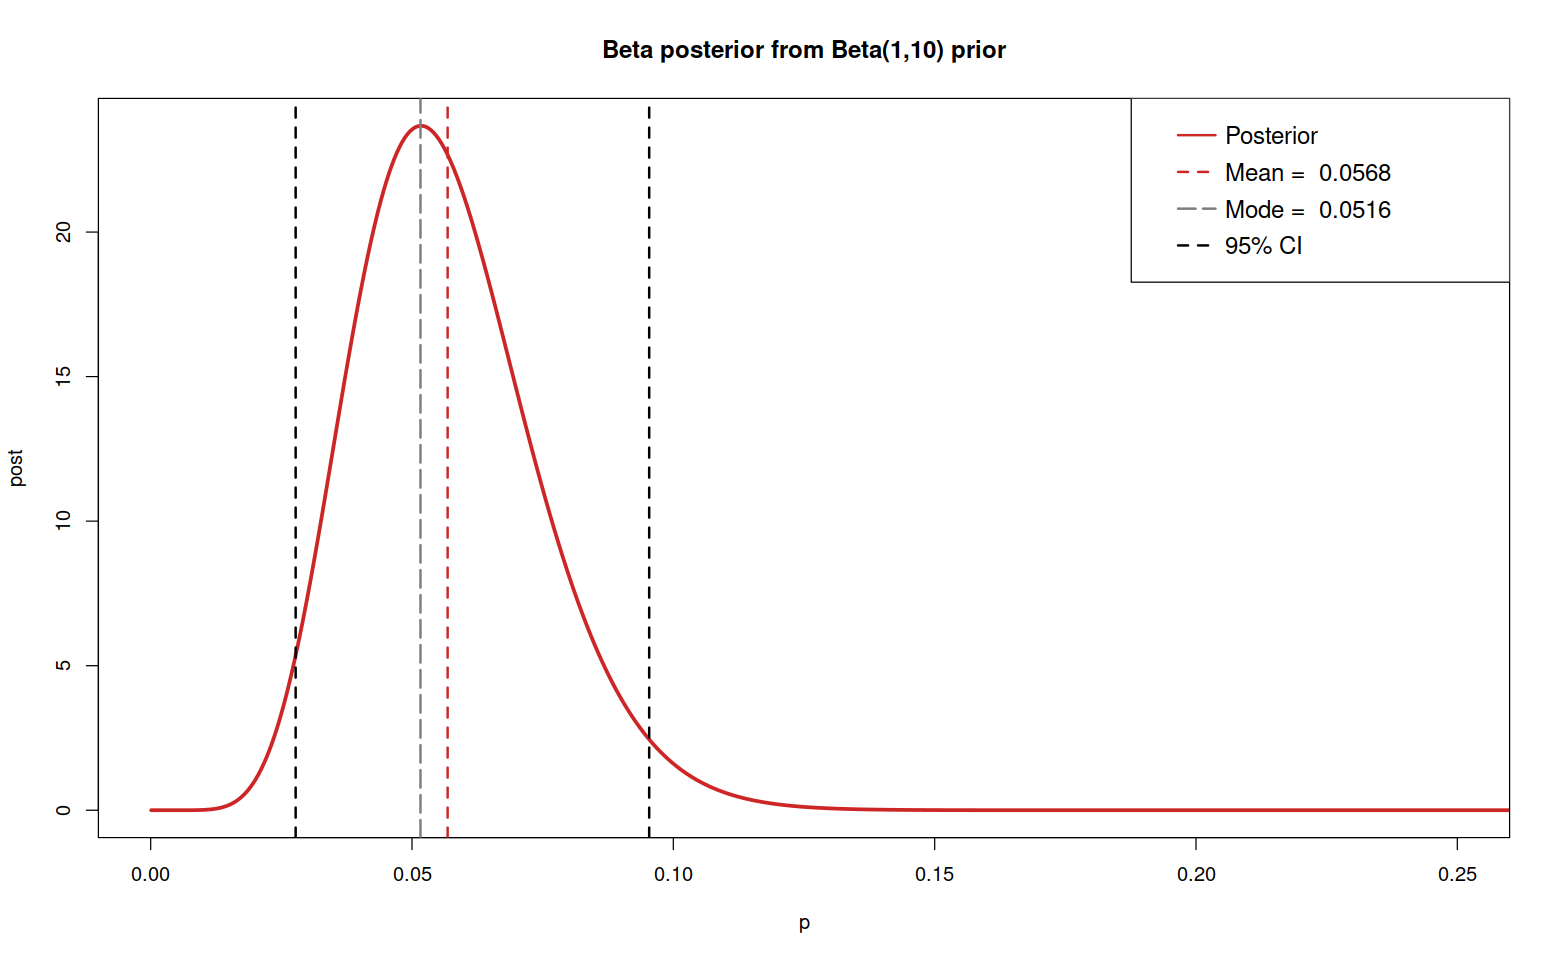

In [32]:
alpha = 1
beta = 10

p = seq(from = 1e-4, to = 1, length.out = 2000)
delta_p = p[2] - p[1]
post = dbeta(p, alpha + y, beta + n - y)
mean_post = sum(p * post) * delta_p
mode_post = p[which.max(post)]
variance_post = sum((p - mean_post) ** 2 * post) * delta_p

lower = qbeta(p = 0.025, alpha + y, beta + n - y)
upper = qbeta(p = 0.975, alpha + y, beta + n - y)

cat(paste('-------- BETA POSTERIOR FROM BETA(', alpha, ',', beta, ') PRIOR --------\n', sep = ''))
cat('mean: ', format(mean_post, digits = 3), sep = '', '\n')
cat('mode: ', format(mode_post, digits = 3), sep = '', '\n')
cat('variance: ', format(variance_post, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower, digits = 3), ', ', format(upper, digits = 3), ')', sep = '', '\n')

plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha, ',', beta, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI'),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black'), 
        lty = c(1, 2, 5, 2), lwd = 2, cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

Here we perform a **Bayesian hypothesis testing** with the posterior we have just calculated. We see that the vertical line representing the probability associated to $p_0$ lies outside the 95% credibility interval. Therefore we can reject the null hypothesis.

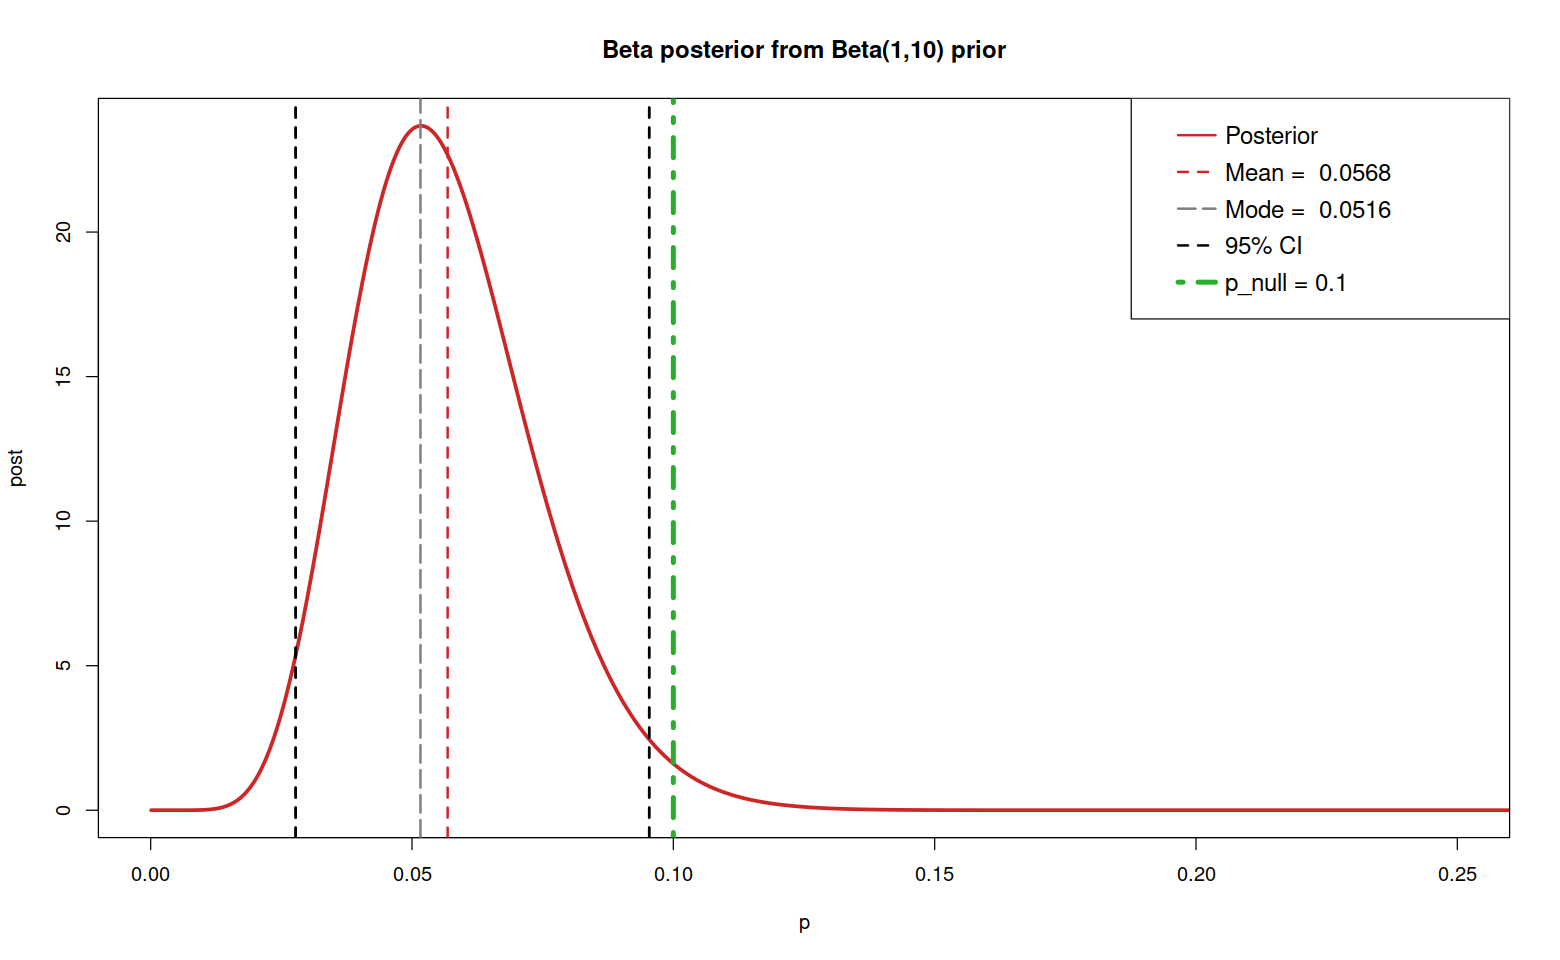

In [33]:
p_null = 0.1

plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha, ',', beta, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
abline(v = p_null, col = '#27b027', lty = 4, lwd = 4)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI', paste('p_null =', p_null)),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black', '#27b027'), 
        lty = c(1, 2, 5, 2, 4), lwd = c(2, 2, 2, 2, 4), cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

In the following cell we **find the posterior for $p$ assuming the posterior of Request (b) as prior**.

-------- BETA POSTERIOR FROM BETA(12,115) PRIOR --------
mean: 0.0719
mode: 0.0691
variance: 0.000228
posterior 95% c.i.: (0.0452, 0.104)


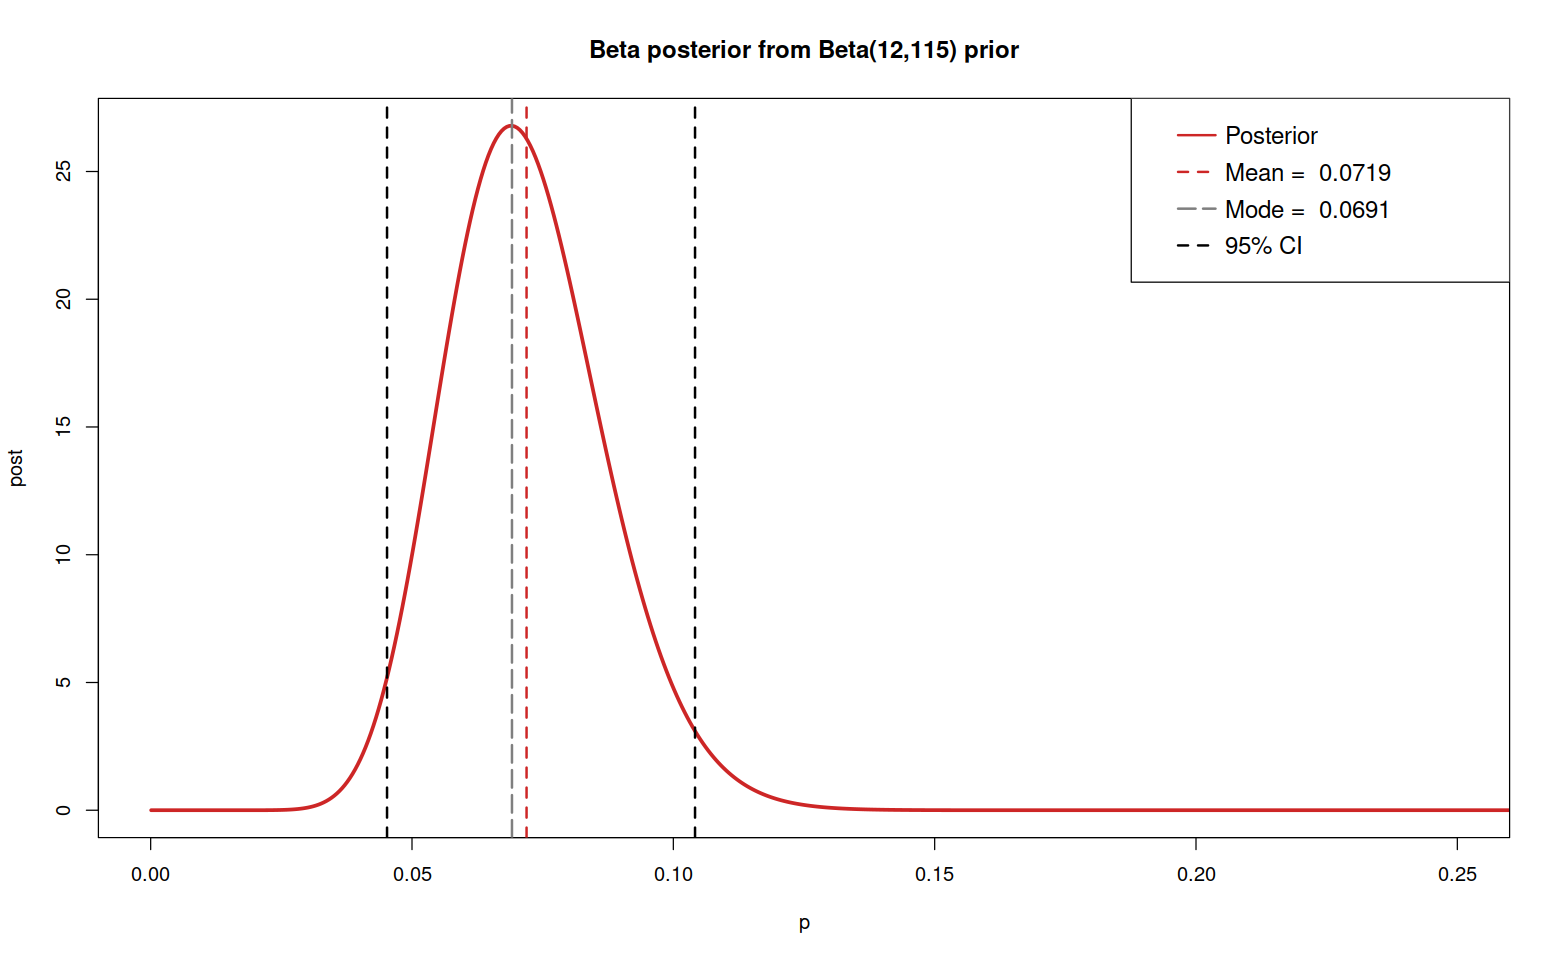

In [34]:
p = seq(from = 1e-4, to = 1, length.out = 2000)
delta_p = p[2] - p[1]
post = dbeta(p, alpha_p + y, beta_p + n - y)
mean_post = sum(p * post) * delta_p
mode_post = p[which.max(post)]
variance_post = sum((p - mean_post) ** 2 * post) * delta_p

lower = qbeta(p = 0.025, alpha_p + y, beta_p + n - y)
upper = qbeta(p = 0.975, alpha_p + y, beta_p + n - y)

cat(paste('-------- BETA POSTERIOR FROM BETA(', alpha_p, ',', beta_p, ') PRIOR --------\n', sep = ''))
cat('mean: ', format(mean_post, digits = 3), sep = '', '\n')
cat('mode: ', format(mode_post, digits = 3), sep = '', '\n')
cat('variance: ', format(variance_post, digits = 3), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower, digits = 3), ', ', format(upper, digits = 3), ')', sep = '', '\n')

plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha_p, ',', beta_p, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI'),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black'), 
        lty = c(1, 2, 5, 2), lwd = 2, cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

Here we perform a **Bayesian hypothesis testing** with the posterior we have just calculated. We see that the vertical line representing the probability associated to $p_0$ lies inside the 95% credibility interval. Therefore we can not reject the null hypothesis.

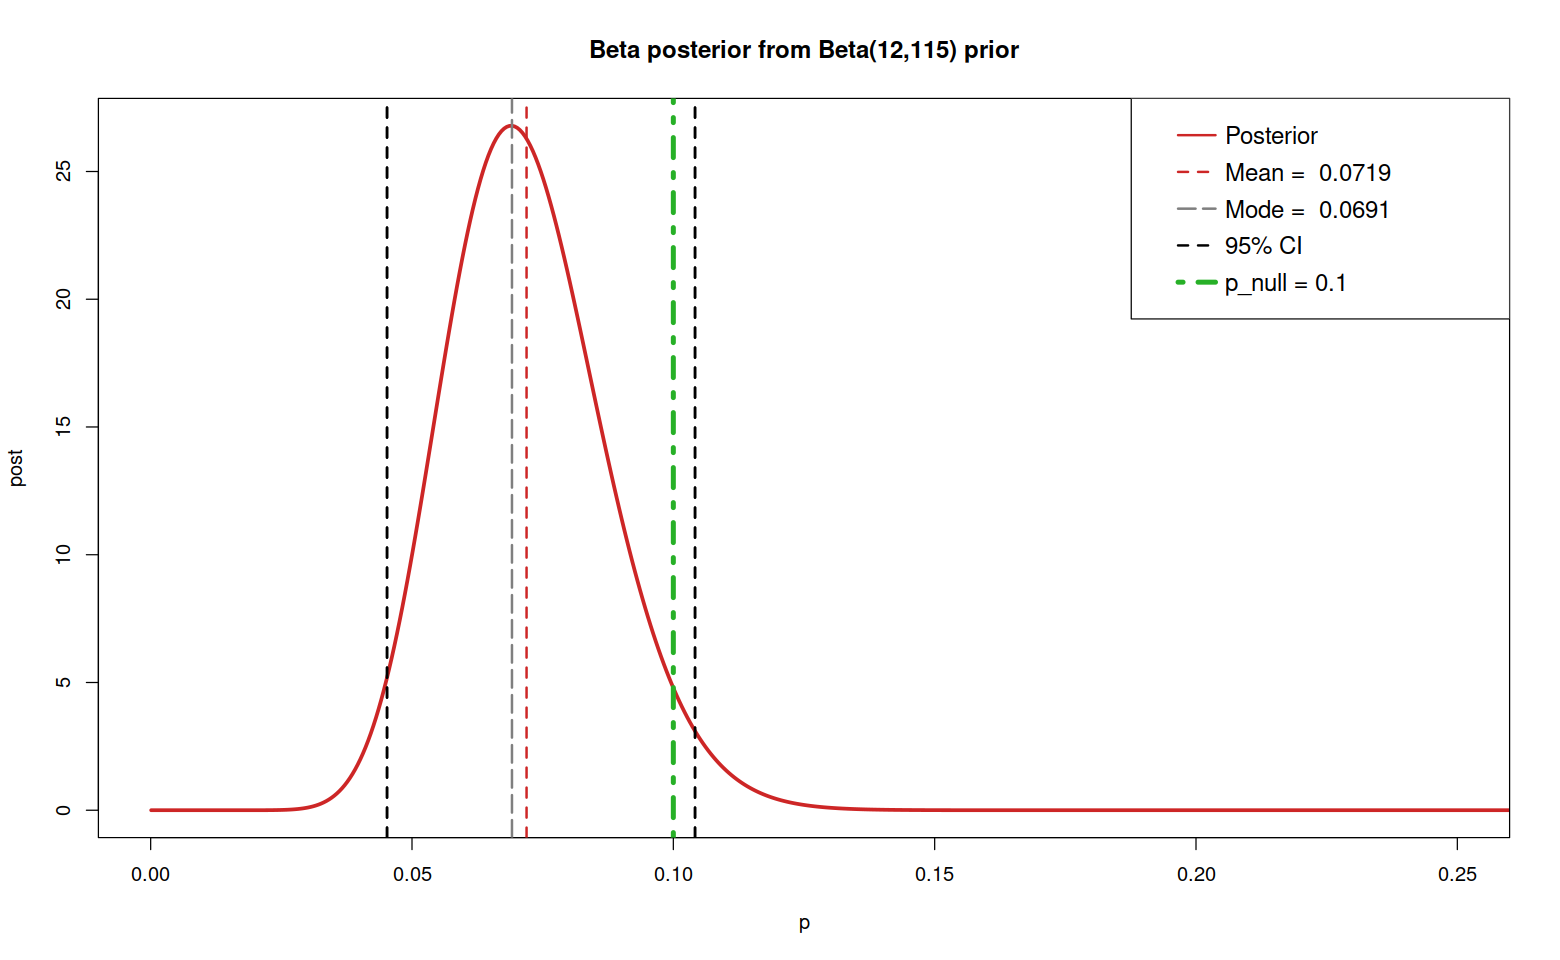

In [35]:
plot(p, post, type = 'l', lwd = 3, xlim = c(0, 0.25), col = 'firebrick3', main = paste('Beta posterior from Beta(', alpha_p, ',', beta_p, ') prior', sep = ''))
abline(v = mean_post, col = 'firebrick3', lty = 2, lwd = 2)
abline(v = mode_post, col = 'grey50', lty = 5, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
abline(v = c(lower, upper), col = 'black', lty = 2, lwd = 2)
abline(v = p_null, col = '#27b027', lty = 4, lwd = 4)
legend('topright', legend = c('Posterior', paste('Mean = ', format(mean_post, digits = 3)), 
        paste('Mode = ', format(mode_post, digits = 3)), '95% CI', paste('p_null =', p_null)),
        col = c('firebrick3', 'firebrick3', 'grey50', 'black', '#27b027'), 
        lty = c(1, 2, 5, 2, 4), lwd = c(2, 2, 2, 2, 4), cex = 1.2, seg.len = 0.8, text.width = 0.05, x.intersp = 0.2)

Eventually we perform a **frequentist** hypothesis test, in the same way as specified for the previous measurement. We see that in this case the observation lies inside the acceptance region, so we do not reject the null hypothesis.

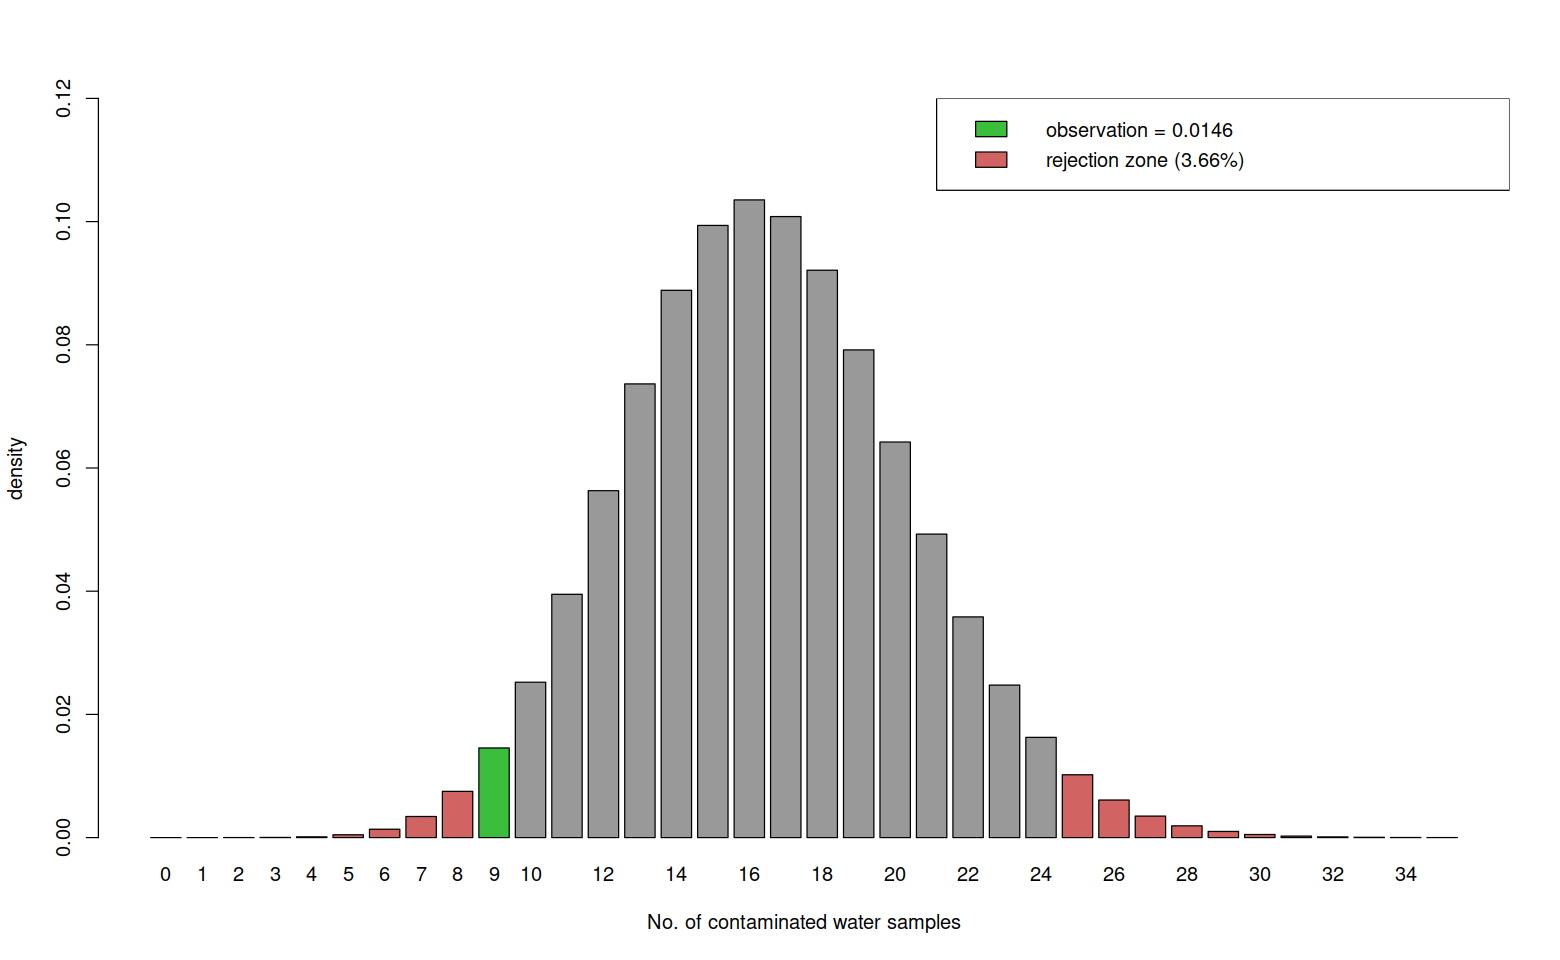

In [36]:
# Frequentist two-sided hypothesis testing
y_possible = 0:35
null_pdf = dbinom(x = y_possible, size = n, prob = p_null)
p_value = null_pdf[y + 1]

sig_level = sum(null_pdf[1:9]) + sum(null_pdf[26:36])

barplot(null_pdf, names.arg = y_possible, ylim = c(0, 0.12), xlab = 'No. of contaminated water samples', ylab = 'density',
        col = c(rep('#d26363',9), '#3bbe3b', rep('grey60', 15), rep('#d26363',11)))
legend('topright', legend = c(paste('observation =', format(p_value, digits = 3)), paste('rejection zone (', format(100 * sig_level, digits = 3), '%)', sep = '')), 
        fill = c('#3bbe3b', '#d26363'))

# Exercise 4

In the following cell we setup the variable needed as input by ```jags.model```.

In [1]:
n = 116
y = 11
data_obs = c(rep(1, y), rep(0, n - y))

data = NULL
data$X = data_obs 
data$n = n 
data$n_next = 10 

Here we call the ```jags.model``` funcion, which creates the ```jags``` object. The file ```model.bug``` has been modified to match the characteristics of this problem.

In [38]:
jm = jags.model('model.bug', data)

Warning message in jags.model("model.bug", data):
“Unused variable "n" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 116
   Unobserved stochastic nodes: 2
   Total graph size: 121

Initializing model



Here we call the ```update``` method in order to perform the burn-in part. Then by calling ```coda.samples``` we get the full chain with the specified number of iterations. Finally we print the chain summary to get required statistics for $p$ and $y$.

In [39]:
update(jm, 1000)
chain = coda.samples(jm, c("p", "y"), n.iter=10000)
results = summary(chain)
print(results)


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean      SD  Naive SE Time-series SE
p 0.0946 0.02599 0.0002599      0.0002599
y 0.9334 0.95124 0.0095124      0.0095124

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.05017 0.07581 0.09235 0.1108 0.1527
y 0.00000 0.00000 1.00000 1.0000 3.0000



We can show the "automatic" plots for the chains of $p$ and $y$.

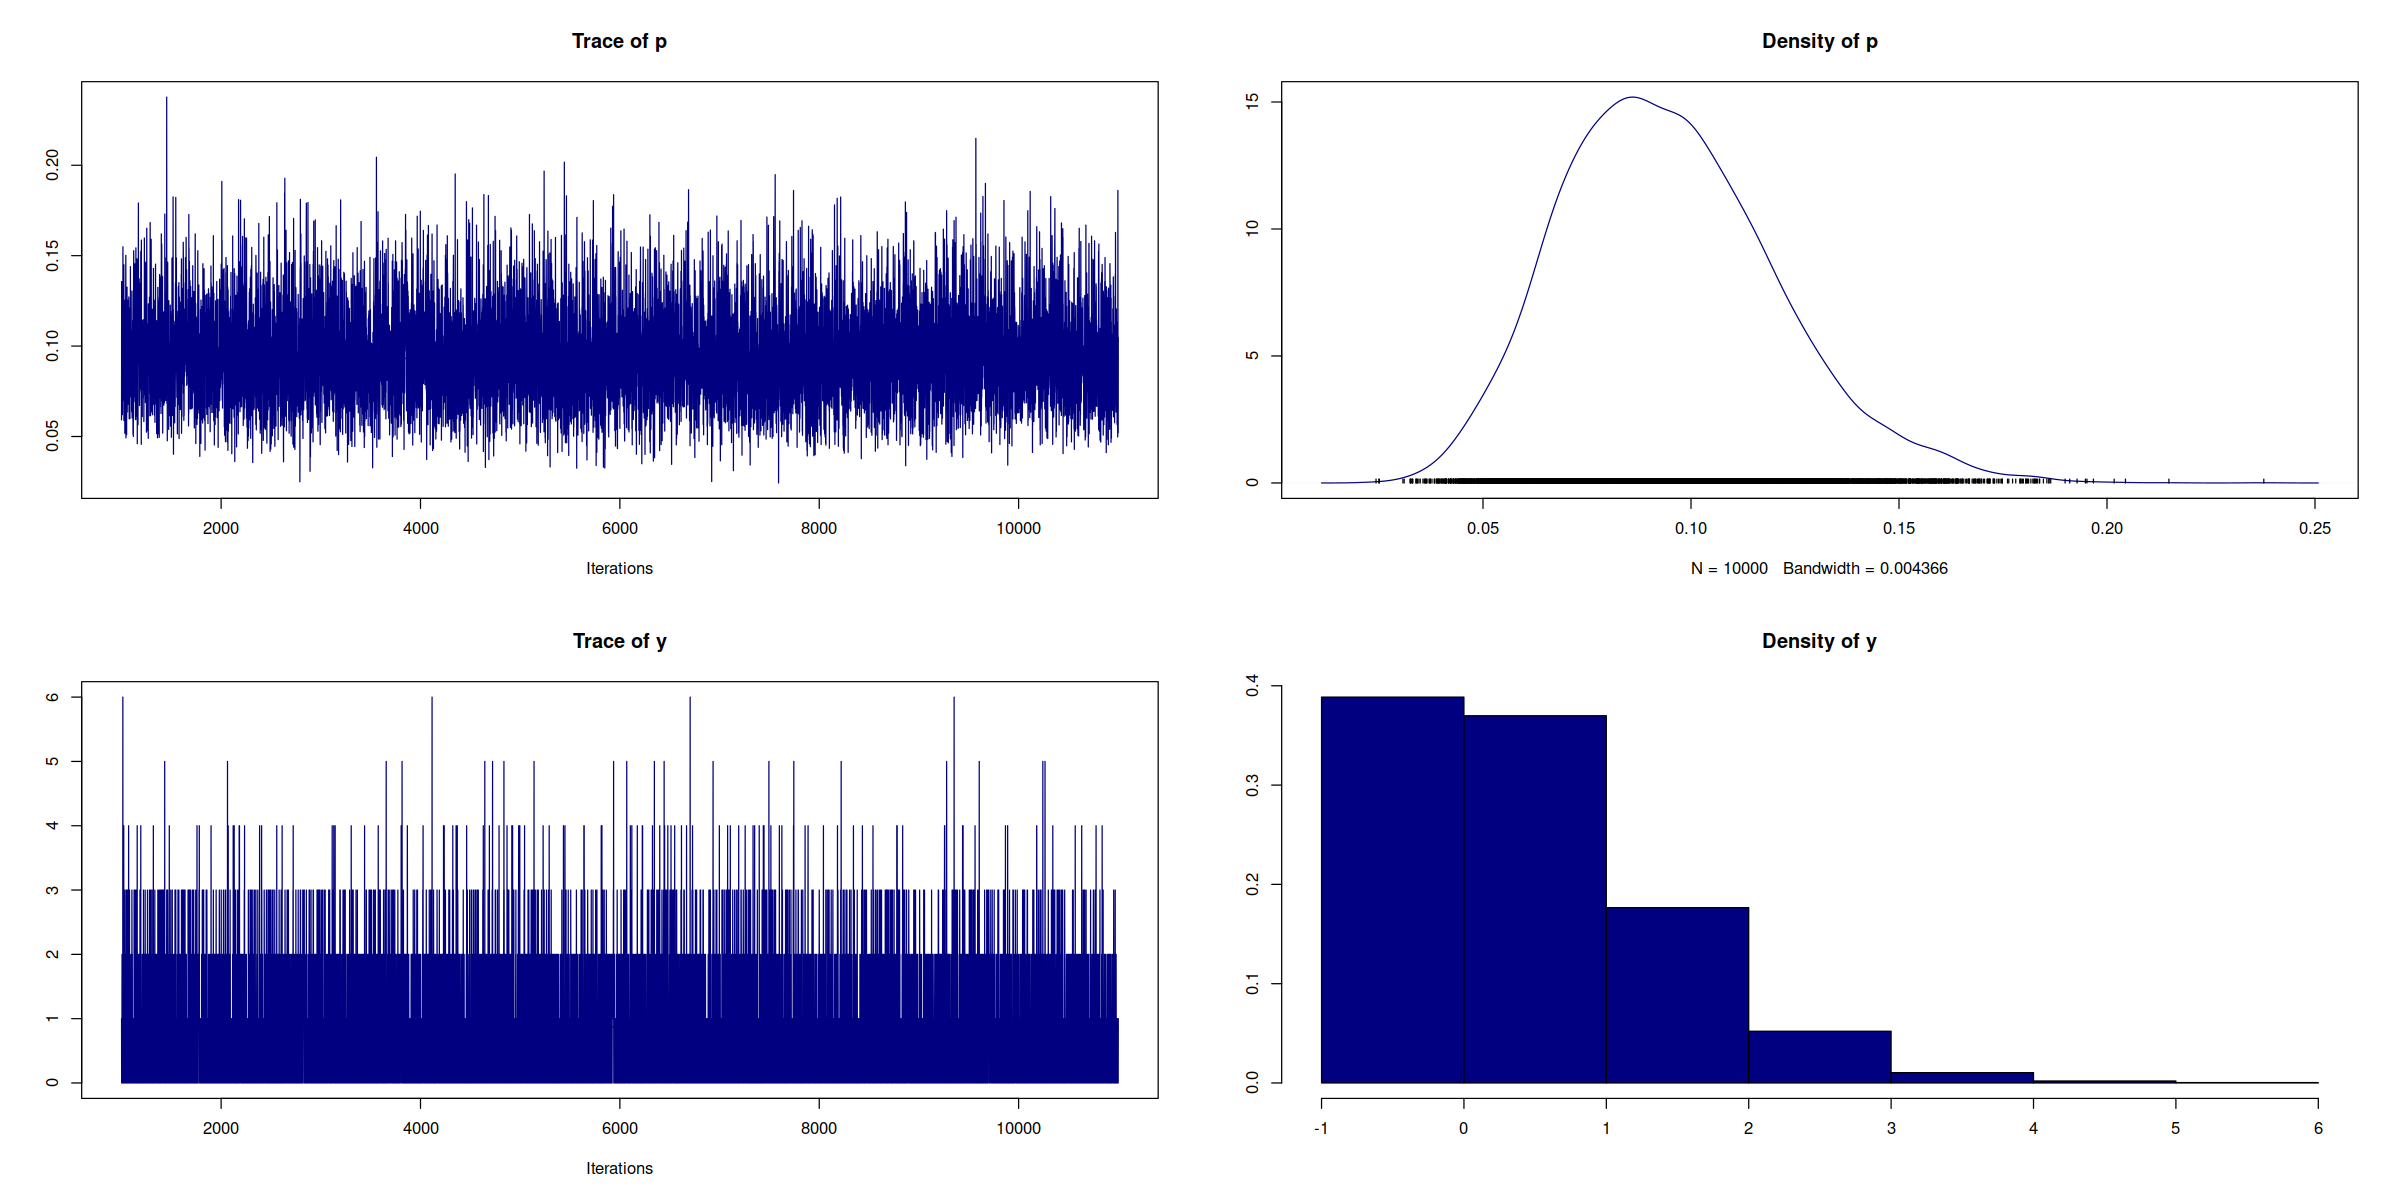

In [40]:
options(repr.plot.width=20, repr.plot.height=10)
plot(chain , col="navy")

Or we can build our own plot in order to showcase the results as we did before.

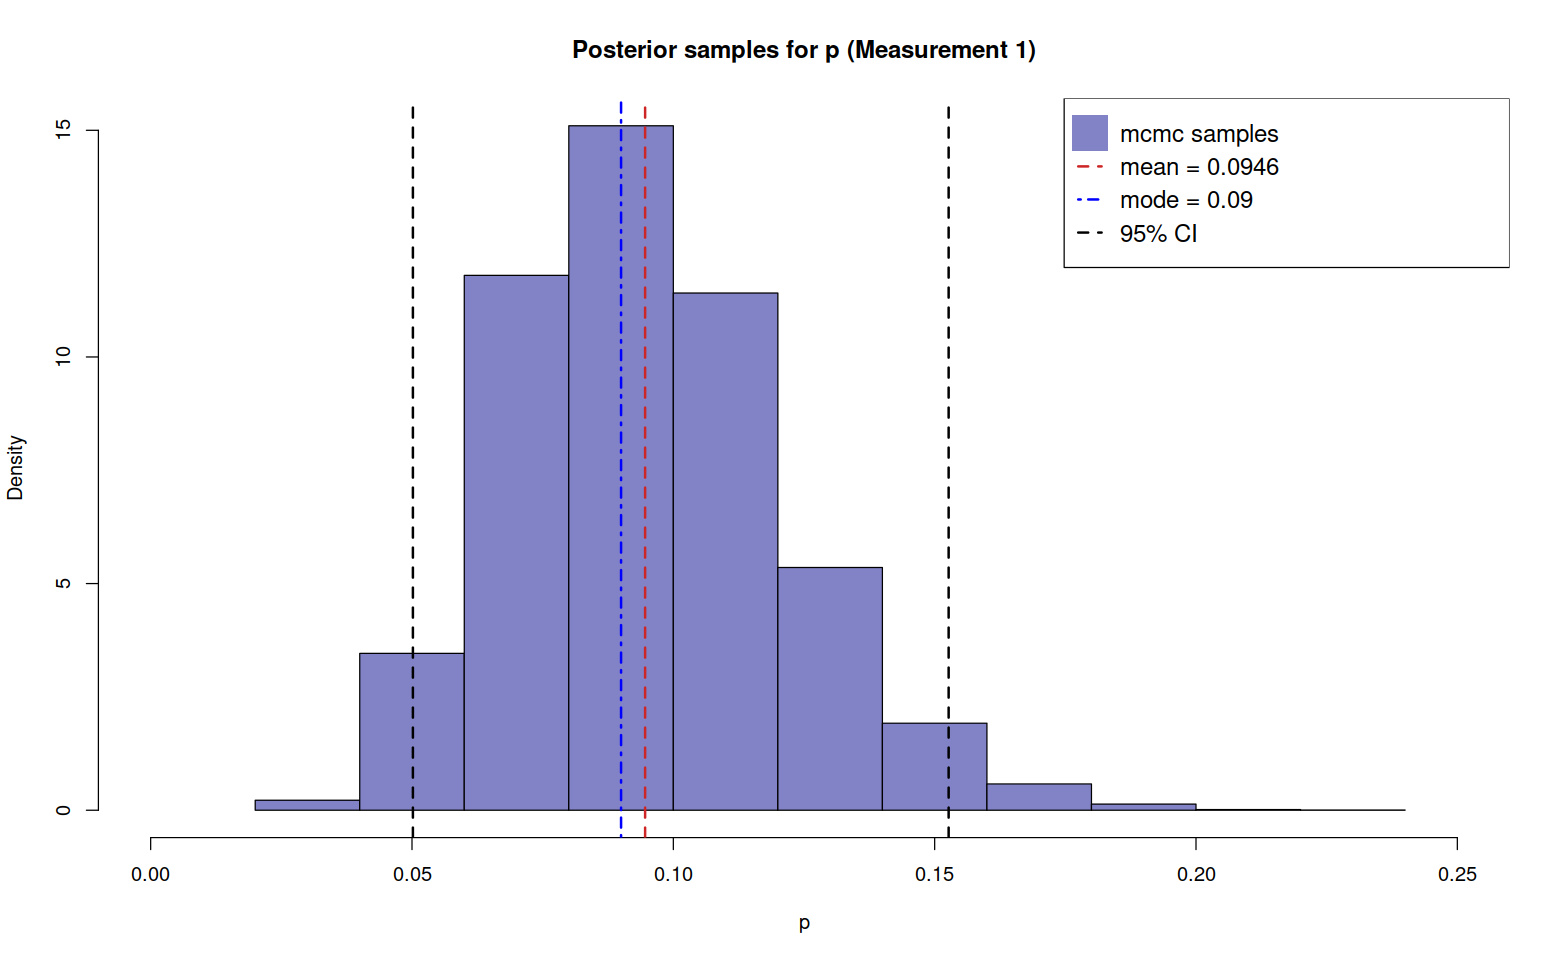

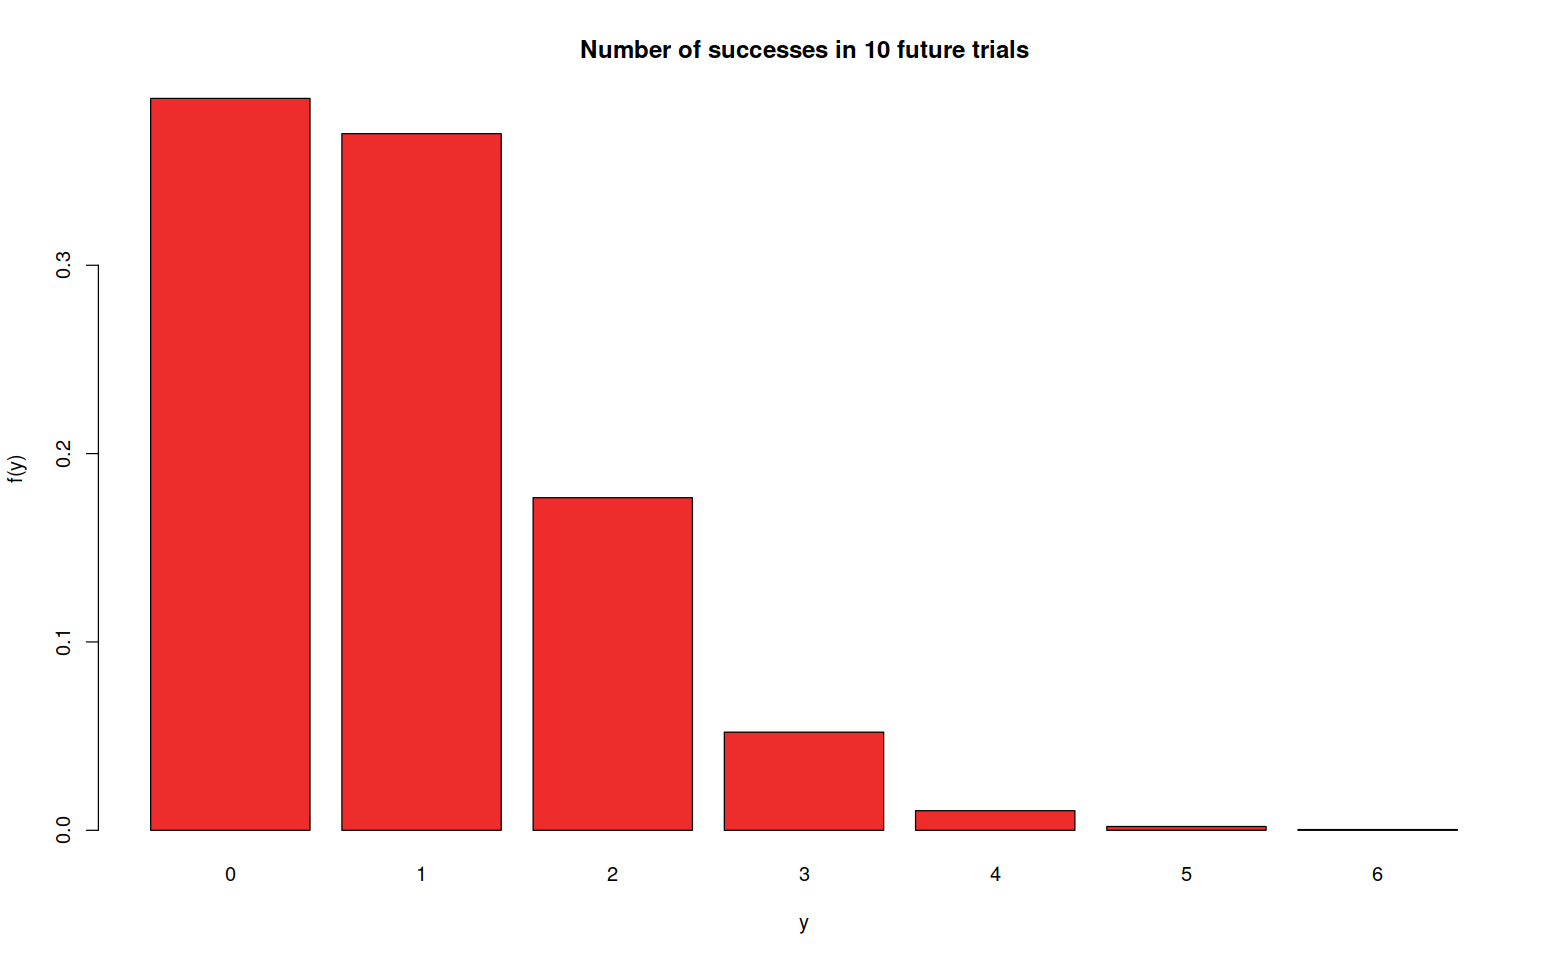

In [41]:
chain_tbl = as_tibble(as.mcmc(chain))

# p histogram = p posterior
options(repr.plot.width=13, repr.plot.height=8)


h = hist(chain_tbl$p, breaks = 'sturges', freq = FALSE, col = '#8282c7', xlab = 'p', xlim = c(0, 0.25),
        main = 'Posterior samples for p (Measurement 1)')
abline(v = results$statistics['p', 'Mean'], col = 'firebrick3', lty = 2, lwd = 2)

mode = h$mids[h$counts == max(h$counts)]

abline(v = mode, col = 'blue', lty = 4, lwd = 2)
abline(v = c(results$quantiles['p', '2.5%'], results$quantiles['p', '97.5%']), col = 'black', lty = 2, lwd = 2)
legend('topright', legend = c('mcmc samples', paste('mean =', format(results$statistics['p', 'Mean'], digits = 4)), paste('mode =', format(mode, digits = 4)), '95% CI'), 
        col = c('#8282c7', 'firebrick3', 'blue', 'black'),
        lty = c(NA, 2, 4, 2), lwd = c(NA, 2, 2, 2), pch = c(15, NA, NA, NA), cex = 1.2, seg.len = 0.5, text.width = 0.07, x.intersp = 0.4, y.intersp = 0.9, pt.cex = 4)

# y barplot = expected number of "wins" in the next 10 trials
ty = table(chain_tbl$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
        main=sprintf('Number of successes in %d future trials', data$n_next))